In [ ]:
from google.colab import files
from google.colab import drive
import pandas as pd
import numpy as np
np.random.seed(40)
import sklearn as sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.pylab import rcParams
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
import plotly.express as ex
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import scipy as scipy
from scipy.stats import uniform, randint
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical


In [ ]:
print(sklearn.__version__)
print(matplotlib.__version__)
print(tf.__version__)
print(keras.__version__)
print(np.__version__)
print(pd.__version__)
print(xgb.__version__)
print(scipy.__version__)


1.0.2
3.2.2
2.8.2
2.8.0
1.21.6
1.3.5
0.90
1.4.1


In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


# Descrição dos dados

In [ ]:
df = pd.read_csv('/content/drive/My Drive/AC/data/breast-cancer.csv')
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().T.any().T.sum()

0

In [ ]:
df.describe(include="all").T


count unique  top freq             mean  \
id                       569.0    NaN  NaN  NaN  30371831.432337   
diagnosis                  569      2    B  357              NaN   
radius_mean              569.0    NaN  NaN  NaN        14.127292   
texture_mean             569.0    NaN  NaN  NaN        19.289649   
perimeter_mean           569.0    NaN  NaN  NaN        91.969033   
area_mean                569.0    NaN  NaN  NaN       654.889104   
smoothness_mean          569.0    NaN  NaN  NaN          0.09636   
compactness_mean         569.0    NaN  NaN  NaN         0.104341   
concavity_mean           569.0    NaN  NaN  NaN         0.088799   
concave points_mean      569.0    NaN  NaN  NaN         0.048919   
symmetry_mean            569.0    NaN  NaN  NaN         0.181162   
fractal_dimension_mean   569.0    NaN  NaN  NaN         0.062798   
radius_se                569.0    NaN  NaN  NaN         0.405172   
texture_se               569.0    NaN  NaN  NaN         1.216853   
perimeter_se             569.0    NaN  NaN  NaN         2.866059   
area_se                  569.0    NaN  NaN  NaN        40.337079   
smoothness_se            569.0    NaN  NaN  NaN         0.007041   
compactness_se           569.0    NaN  NaN  NaN         0.025478   
concavity_se             569.0    NaN  NaN  NaN         0.031894   
concave points_se        569.0    NaN  NaN  NaN         0.011796   
symmetry_se              569.0    NaN  NaN  NaN         0.020542   
fractal_dimension_se     569.0    NaN  NaN  NaN         0.003795   
radius_worst             569.0    NaN  NaN  NaN         16.26919   
texture_worst            569.0    NaN  NaN  NaN        25.677223   
perimeter_worst          569.0    NaN  NaN  NaN       107.261213   
area_worst               569.0    NaN  NaN  NaN       880.583128   
smoothness_worst         569.0    NaN  NaN  NaN         0.132369   
compactness_worst        569.0    NaN  NaN  NaN         0.254265   
concavity_worst          569.0    NaN  NaN  NaN         0.272188   
concave points_worst     569.0    NaN  NaN  NaN         0.114606   
symmetry_worst           569.0    NaN  NaN  NaN         0.290076   
fractal_dimension_worst  569.0    NaN  NaN  NaN         0.083946   

                                      std       min       25%       50%  \
id                       125020585.612224    8670.0  869218.0  906024.0   
diagnosis                             NaN       NaN       NaN       NaN   
radius_mean                      3.524049     6.981      11.7     13.37   
texture_mean                     4.301036      9.71     16.17     18.84   
perimeter_mean                  24.298981     43.79     75.17     86.24   
area_mean                      351.914129     143.5     420.3     551.1   
smoothness_mean                  0.014064   0.05263   0.08637   0.09587   
compactness_mean                 0.052813   0.01938   0.06492   0.09263   
concavity_mean                    0.07972       0.0   0.02956   0.06154   
concave points_mean              0.038803       0.0   0.02031    0.0335   
symmetry_mean                    0.027414     0.106    0.1619    0.1792   
fractal_dimension_mean            0.00706   0.04996    0.0577   0.06154   
radius_se                        0.277313    0.1115    0.2324    0.3242   
texture_se                       0.551648    0.3602    0.8339     1.108   
perimeter_se                     2.021855     0.757     1.606     2.287   
area_se                         45.491006     6.802     17.85     24.53   
smoothness_se                    0.003003  0.001713  0.005169   0.00638   
compactness_se                   0.017908  0.002252   0.01308   0.02045   
concavity_se                     0.030186       0.0   0.01509   0.02589   
concave points_se                 0.00617       0.0  0.007638   0.01093   
symmetry_se                      0.008266  0.007882   0.01516   0.01873   
fractal_dimension_se             0.002646  0.000895  0.002248  0.003187   
radius_worst                     4.833242      7.93    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Data Processing


In [ ]:
# Remove ID from dataframe
df.drop('id',1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


# Data Visualization

## Corr plot

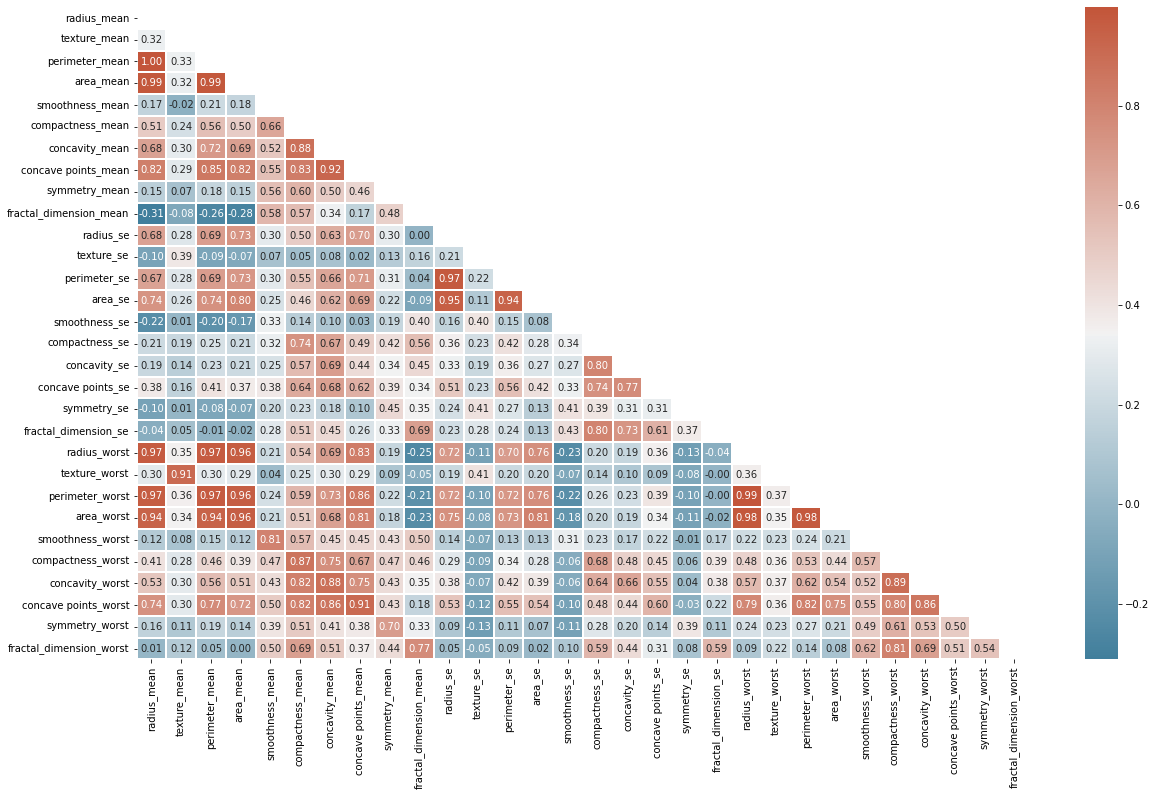

In [ ]:
plt.figure(figsize = (20, 12))

# compute the correlation matrix
corr = df.corr()
# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, linewidths = 1, cmap=cmap, annot = True, fmt = ".2f")
plt.show()

## Histogramas


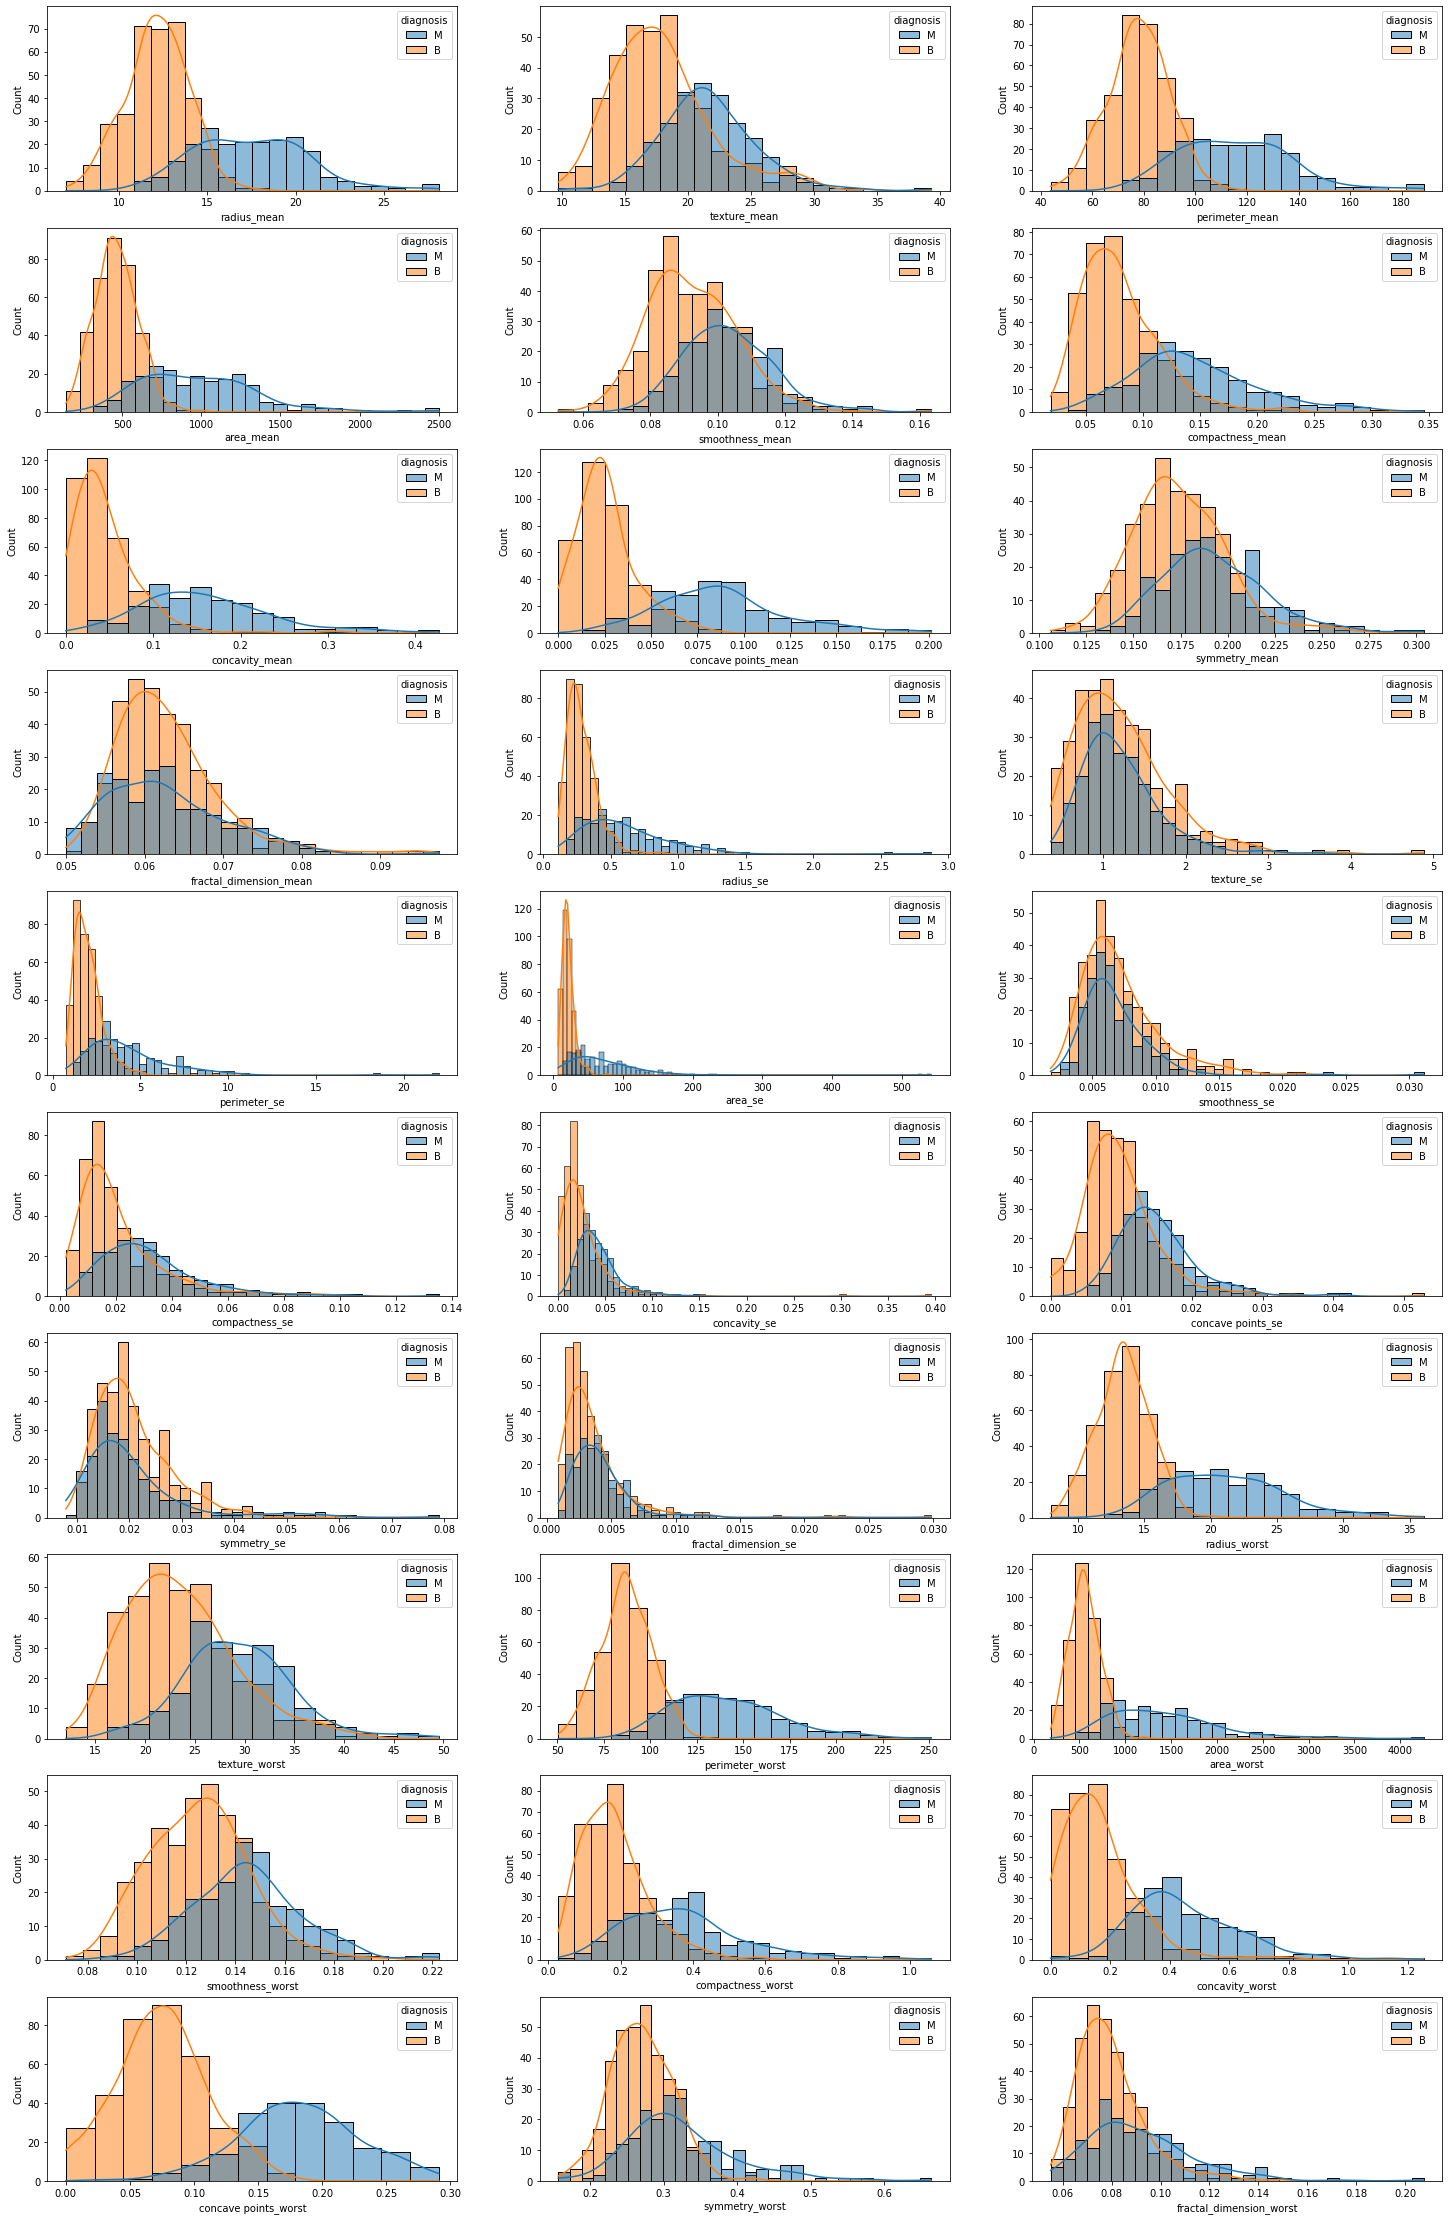

In [ ]:
plt.figure(figsize=(25,40))
for i in range (1, 31):
    plt.subplot(10,3,i)
    sns.histplot(data = df, x = df.iloc[:,i:i+1].columns[0], kde=True, hue='diagnosis')

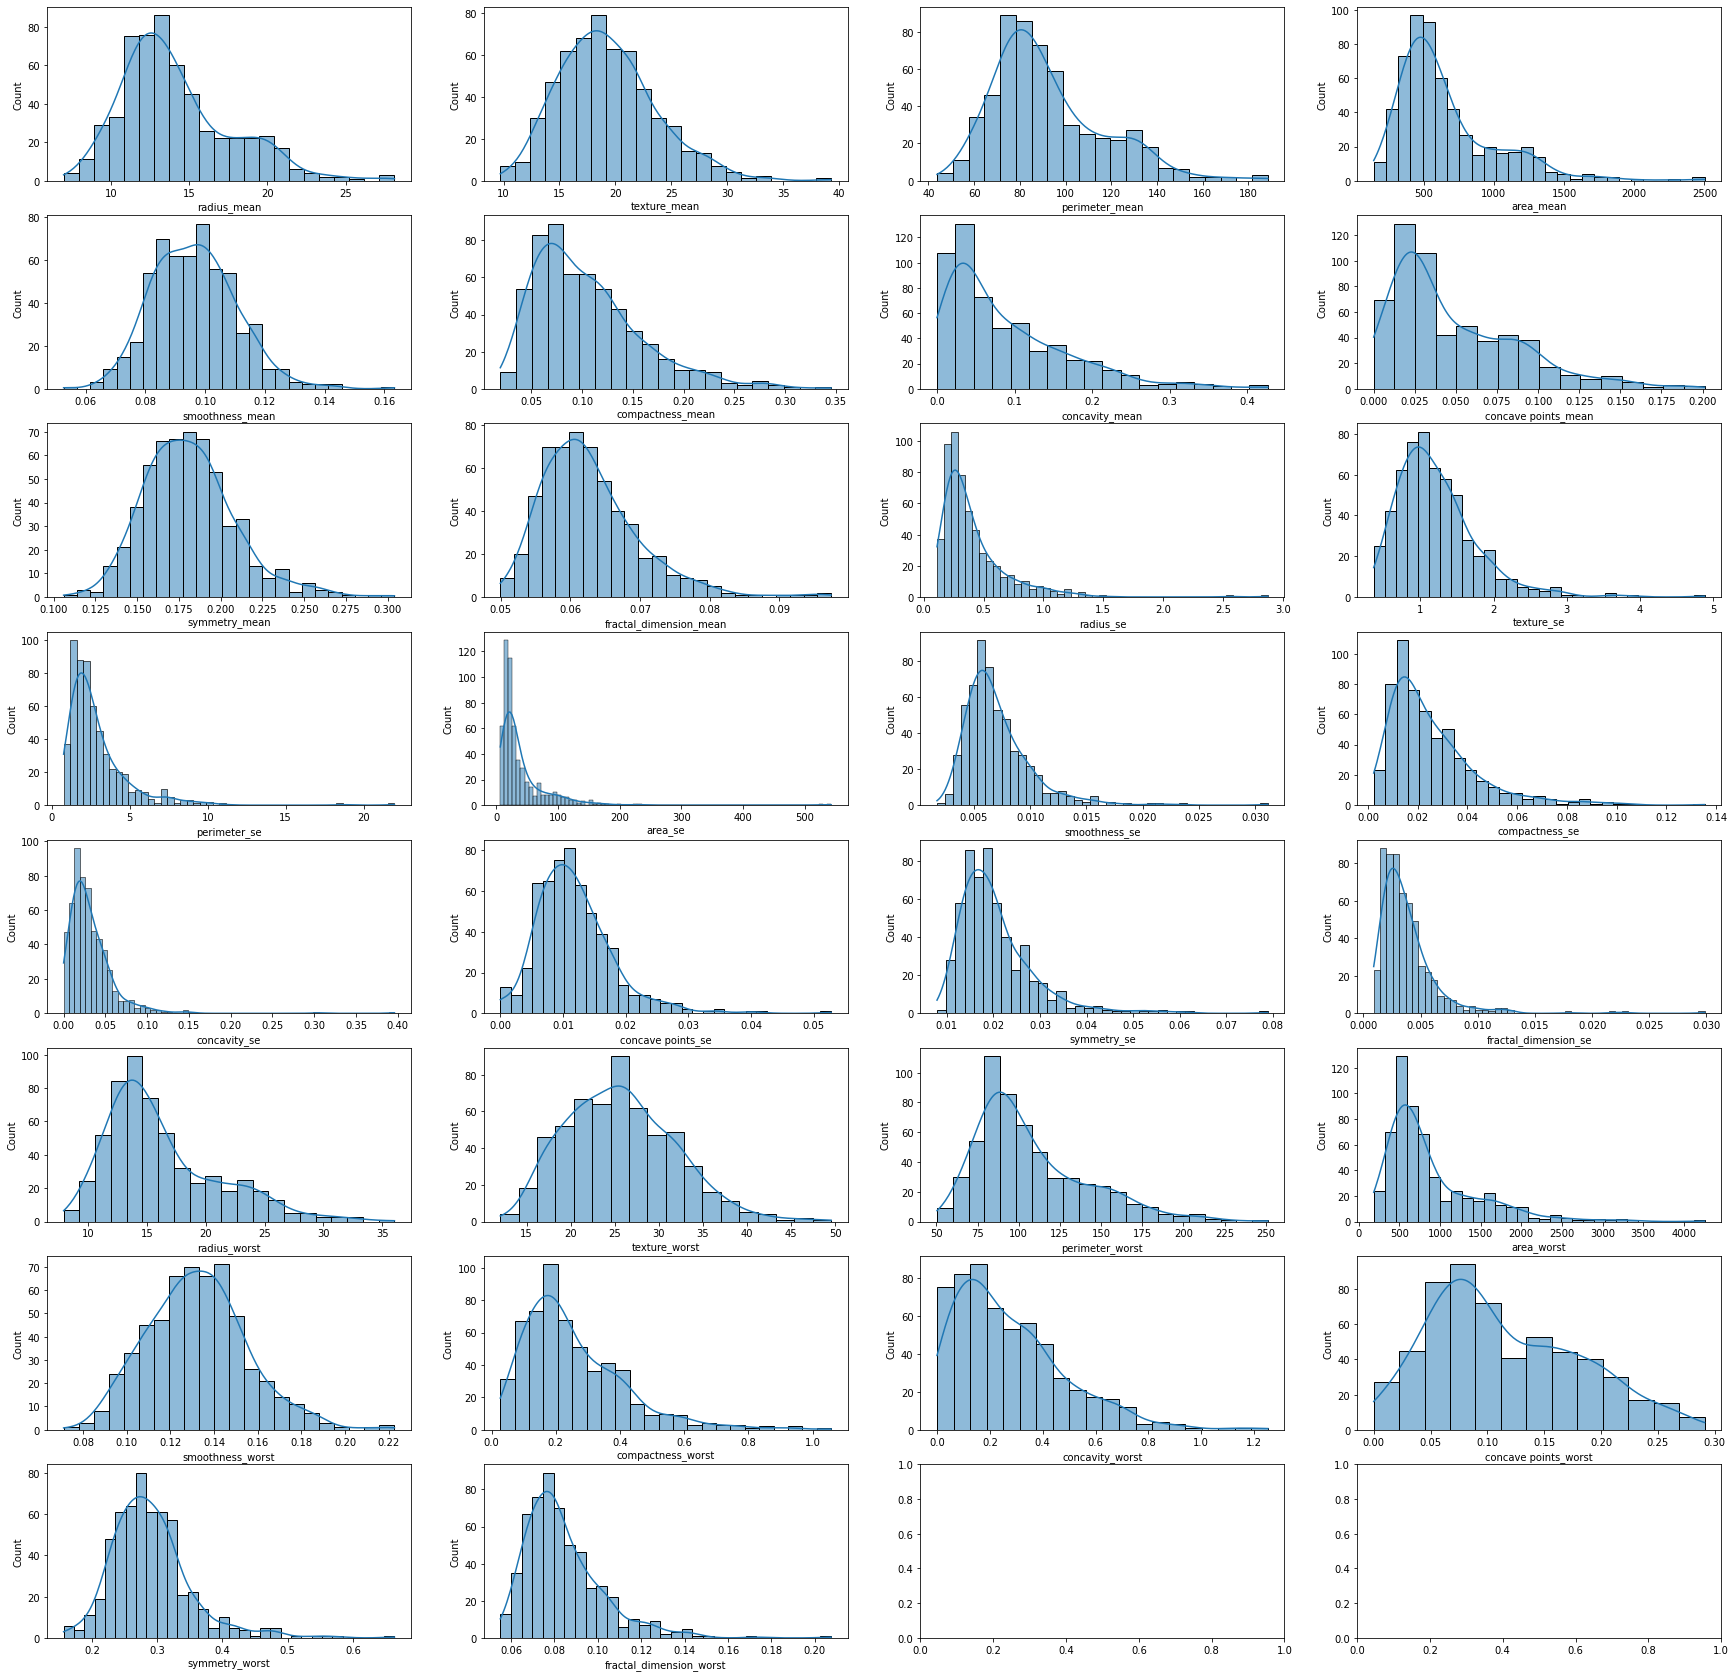

In [ ]:
fig, ax = plt.subplots(8, 4, figsize=(30,30))
for ax, col in zip(ax.flatten(), list(df.select_dtypes('float64','int64'))):
    sns.histplot(df[col], kde=True, ax=ax)

radius_mean


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


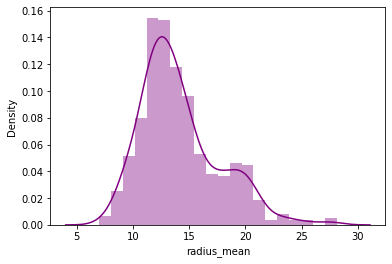

texture_mean


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


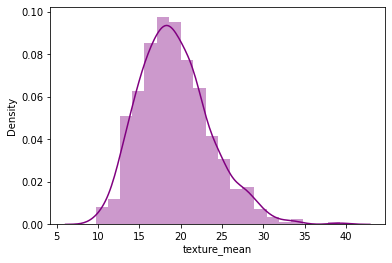

perimeter_mean


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


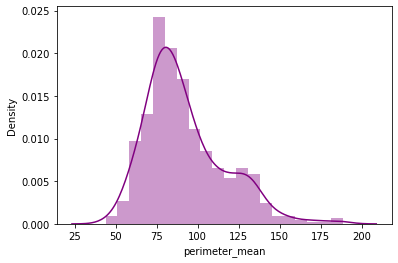

area_mean


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


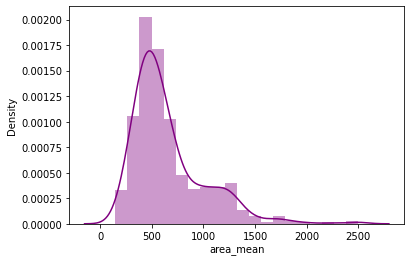

smoothness_mean


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


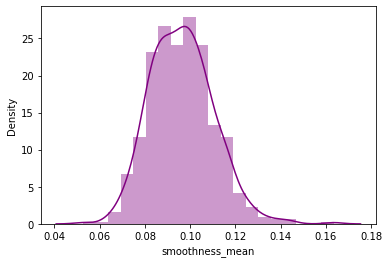

compactness_mean


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


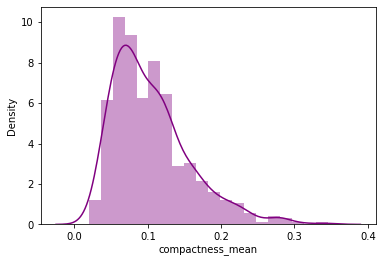

concavity_mean


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


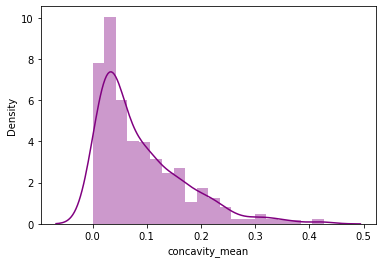

concave points_mean


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


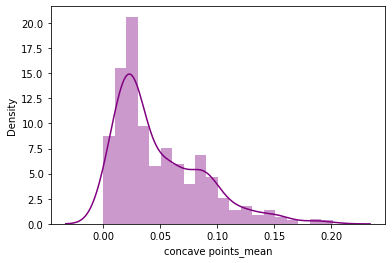

symmetry_mean


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


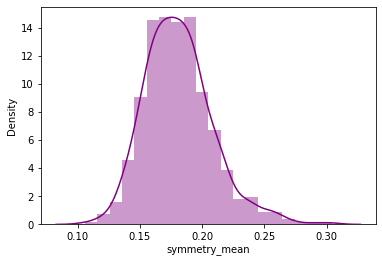

fractal_dimension_mean


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


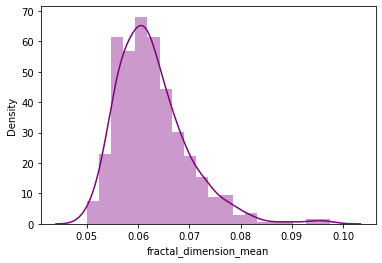

radius_se


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


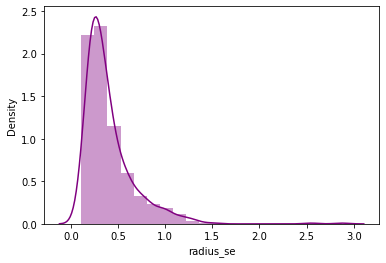

texture_se


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


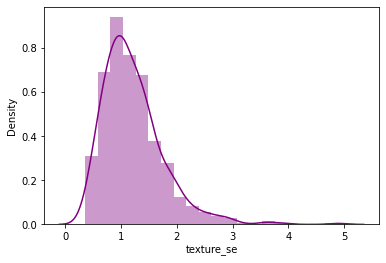

perimeter_se


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


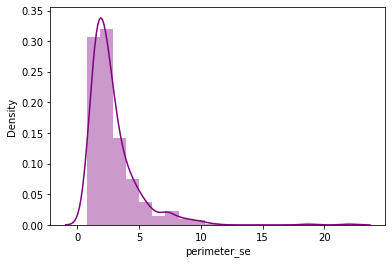

area_se


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


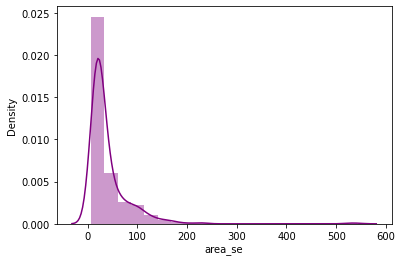

smoothness_se


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


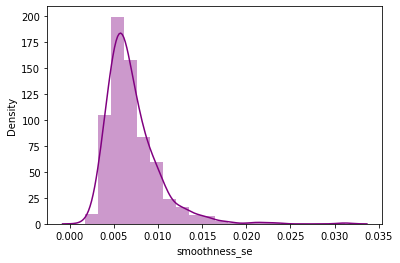

compactness_se


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


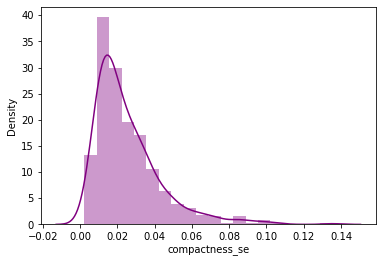

concavity_se


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


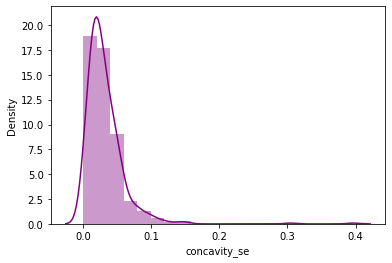

concave points_se


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


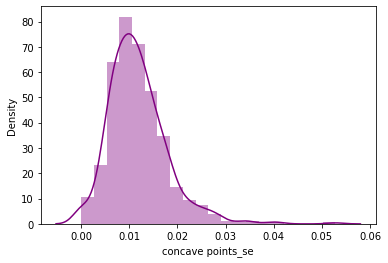

symmetry_se


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


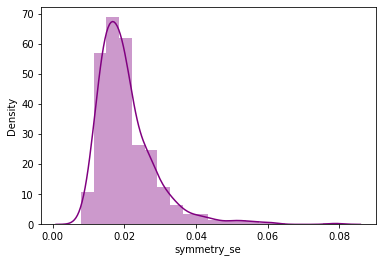

fractal_dimension_se


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


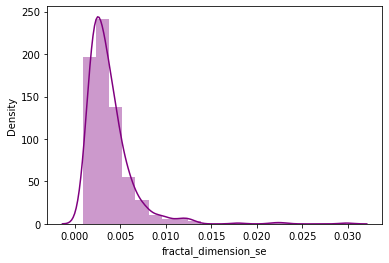

radius_worst


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


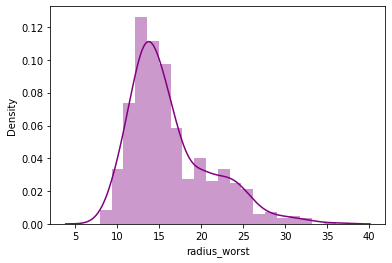

texture_worst


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


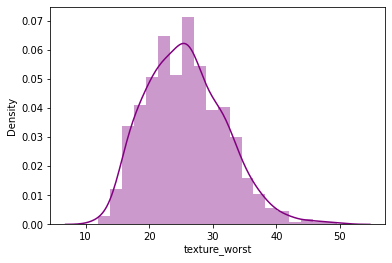

perimeter_worst


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


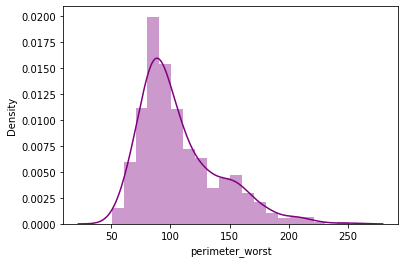

area_worst


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


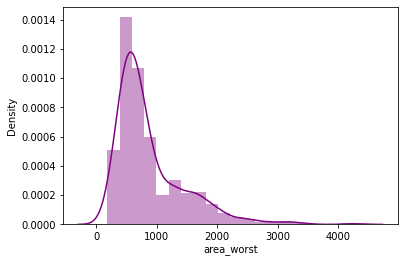

smoothness_worst


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


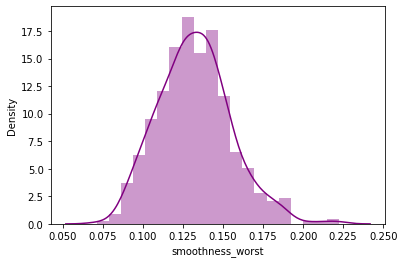

compactness_worst


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


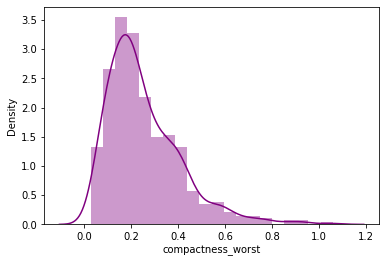

concavity_worst


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


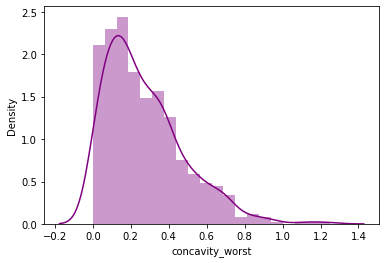

concave points_worst


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


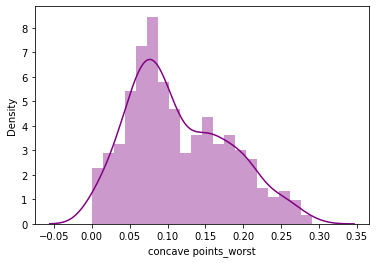

symmetry_worst


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


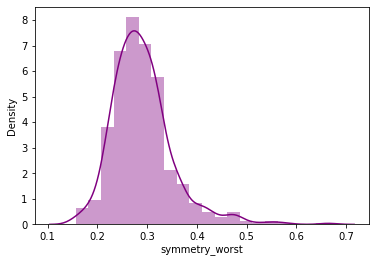

fractal_dimension_worst


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


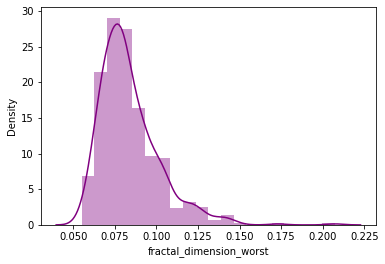

In [ ]:
temp_df = df.drop(['diagnosis'], axis=1)
for col in temp_df.columns:
  print(col)
  sns.distplot(a=temp_df[col], bins=20, color='purple')
  plt.show()

#Podemos ver que muitos dos plots tem skewness (nao estao normalizados). Para aplicar PCA temos que normalizar dados primeiro

## Violin plot (boxplot+densidade) em funçao da dependente

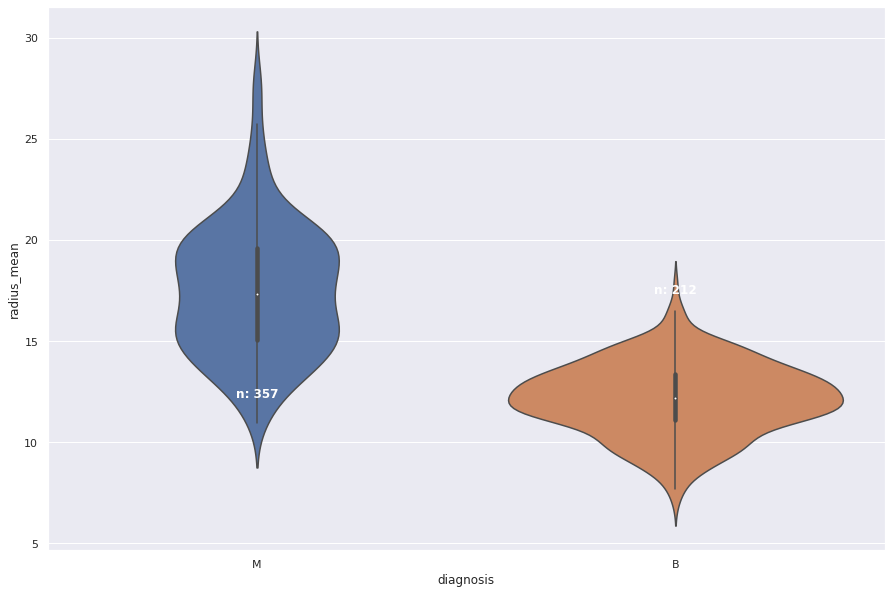

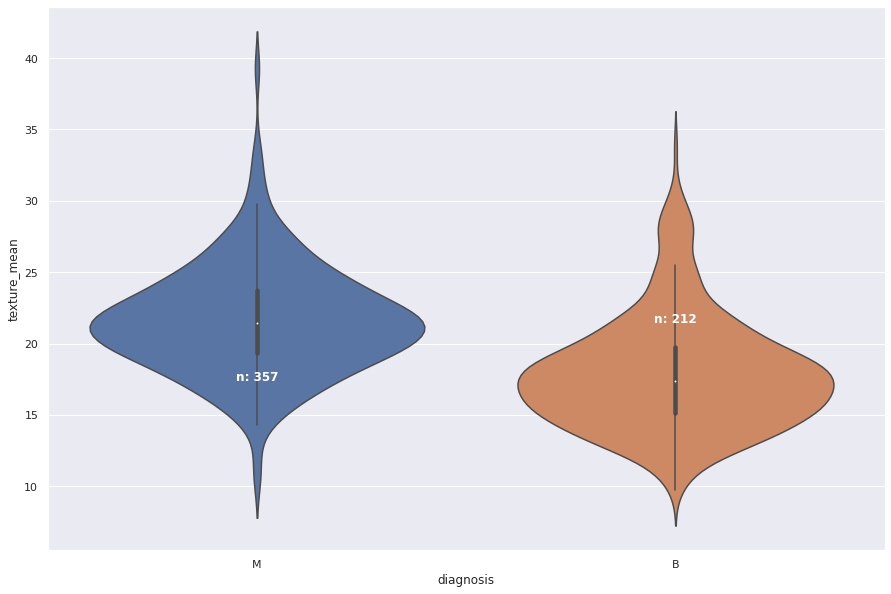

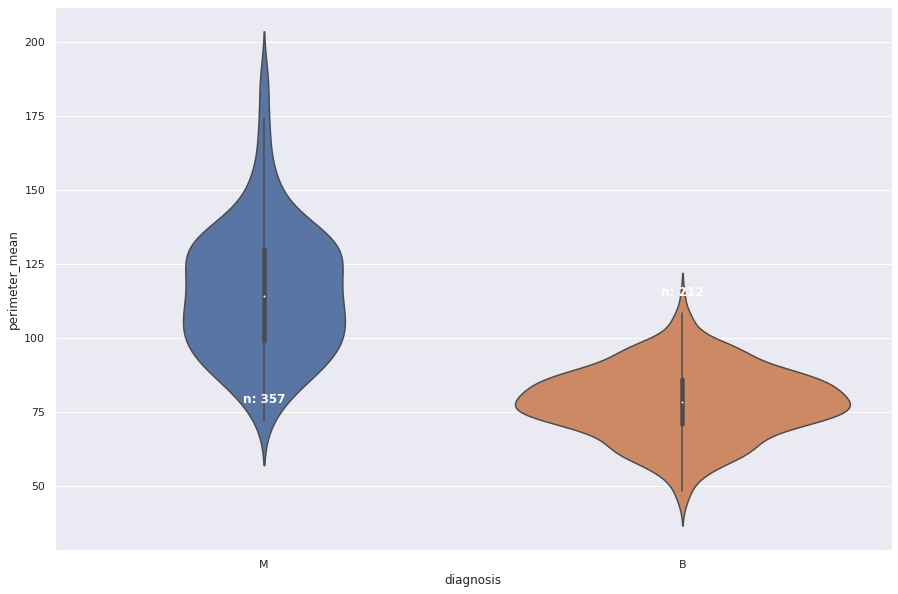

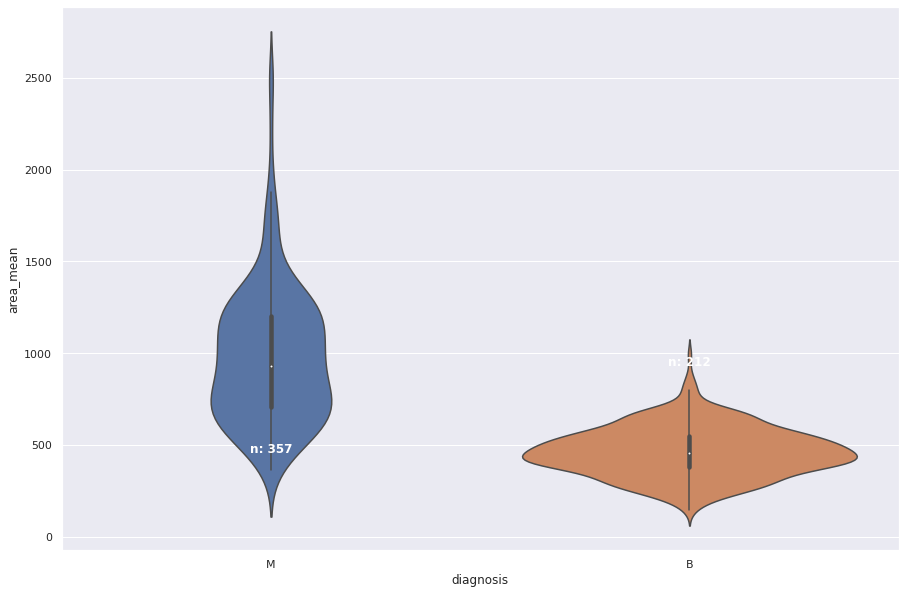

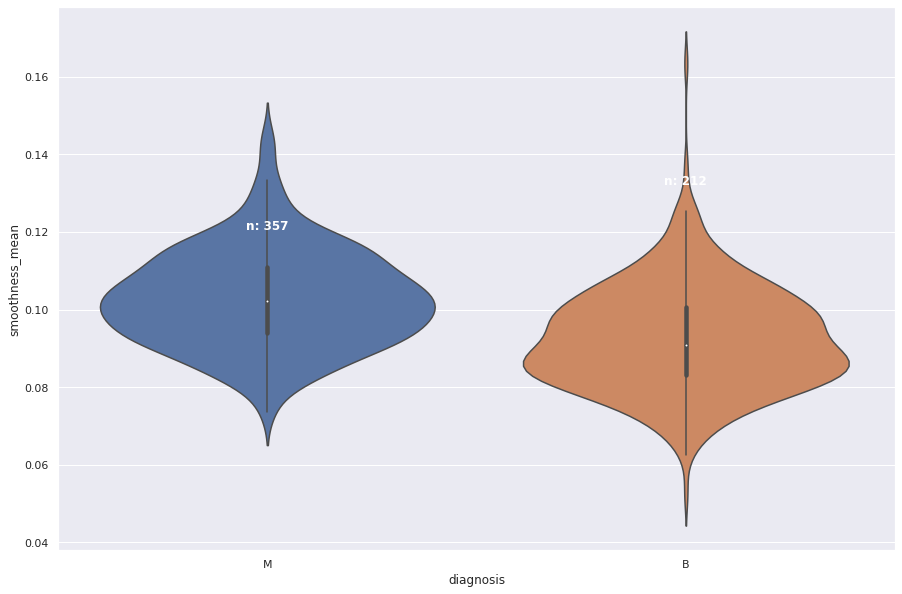

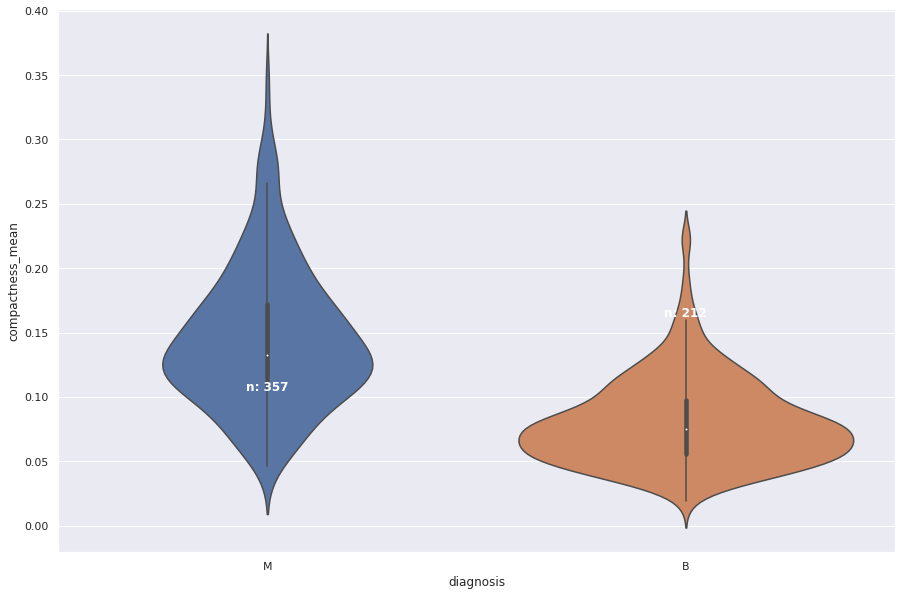

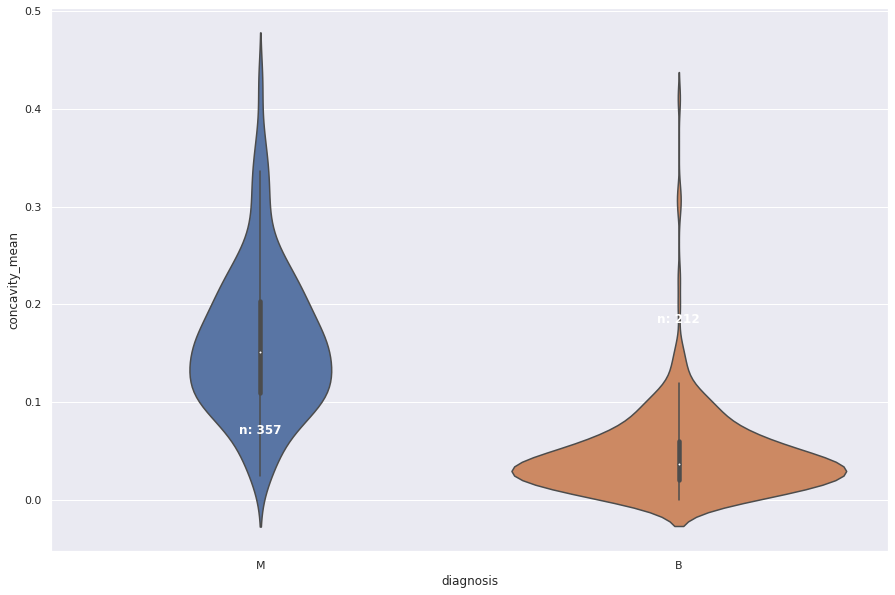

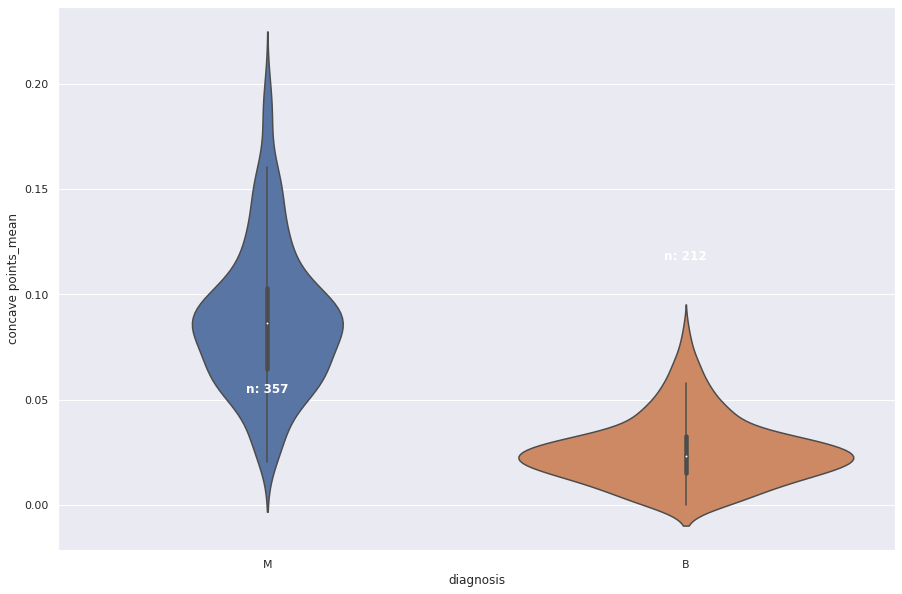

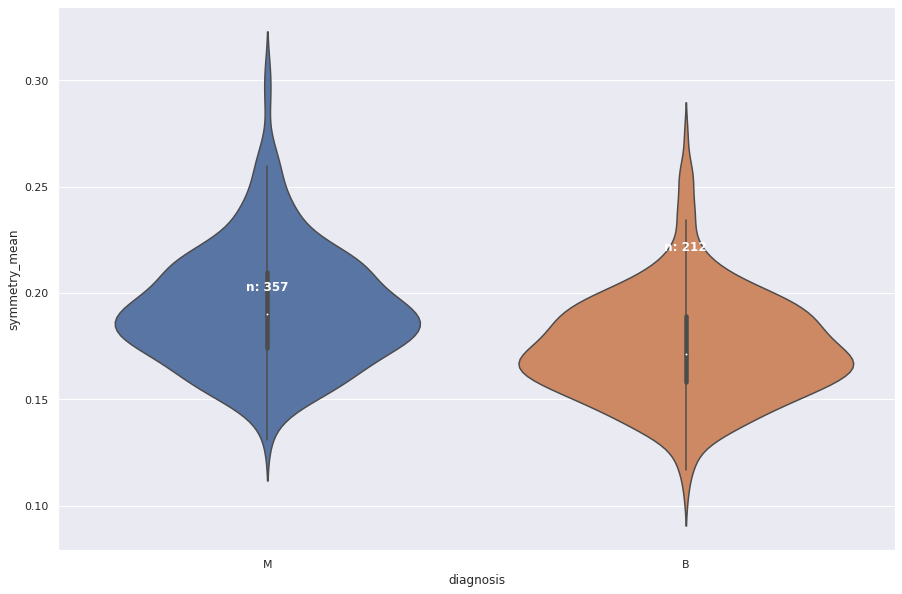

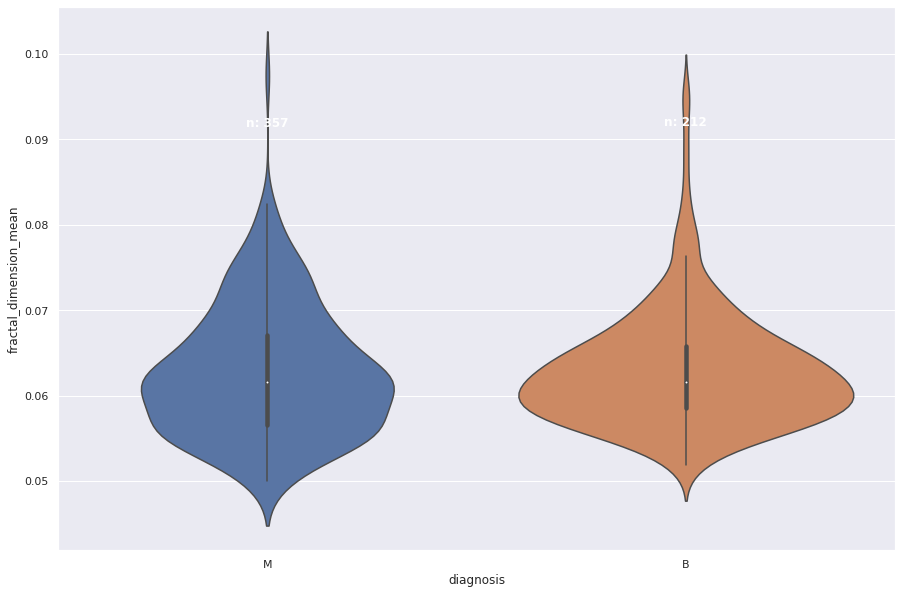

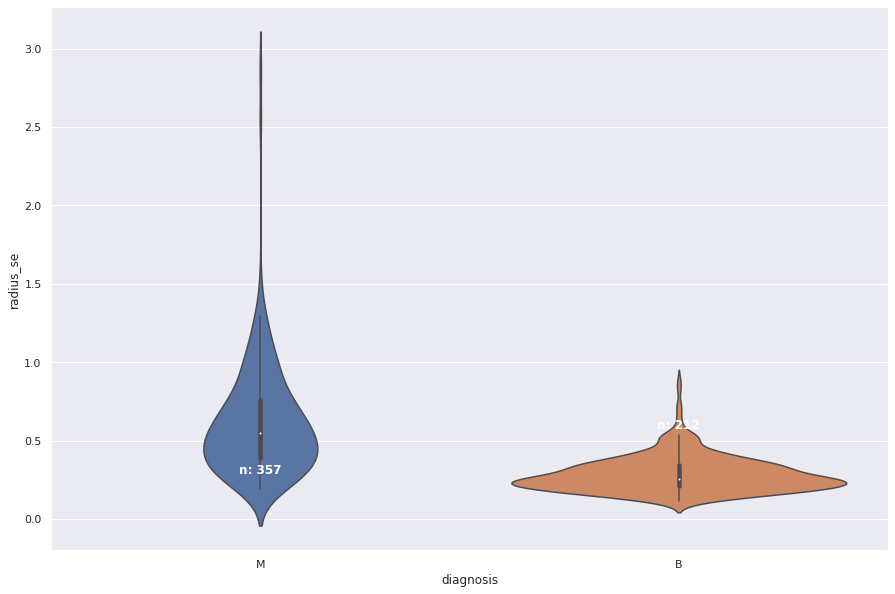

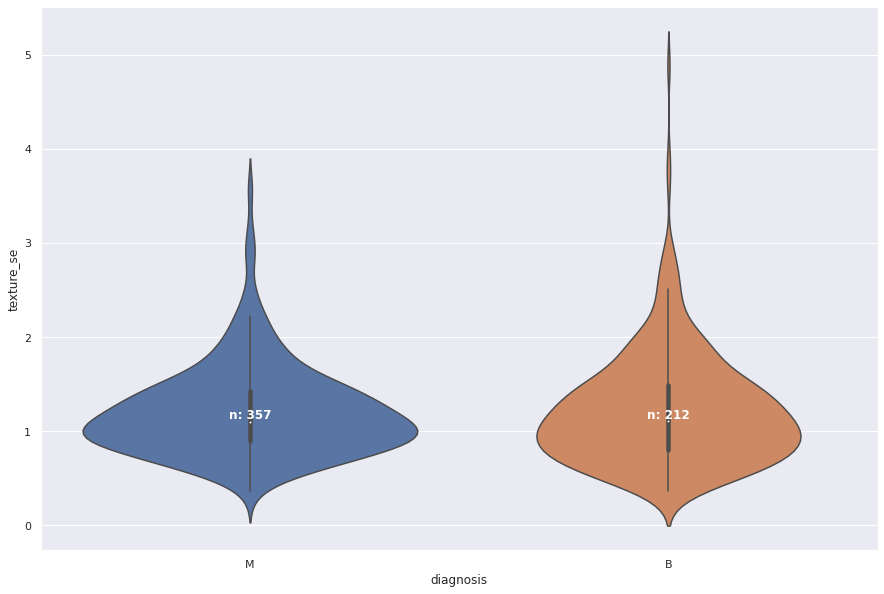

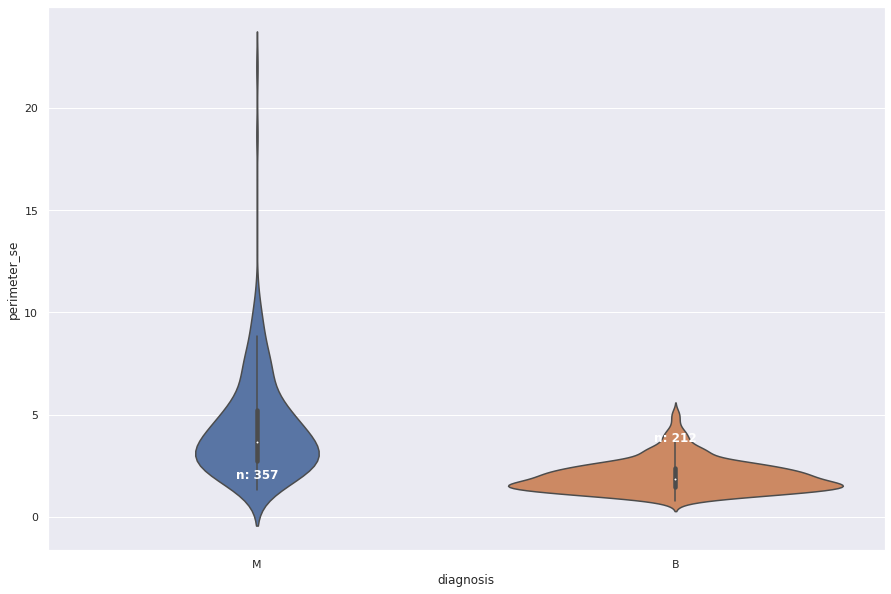

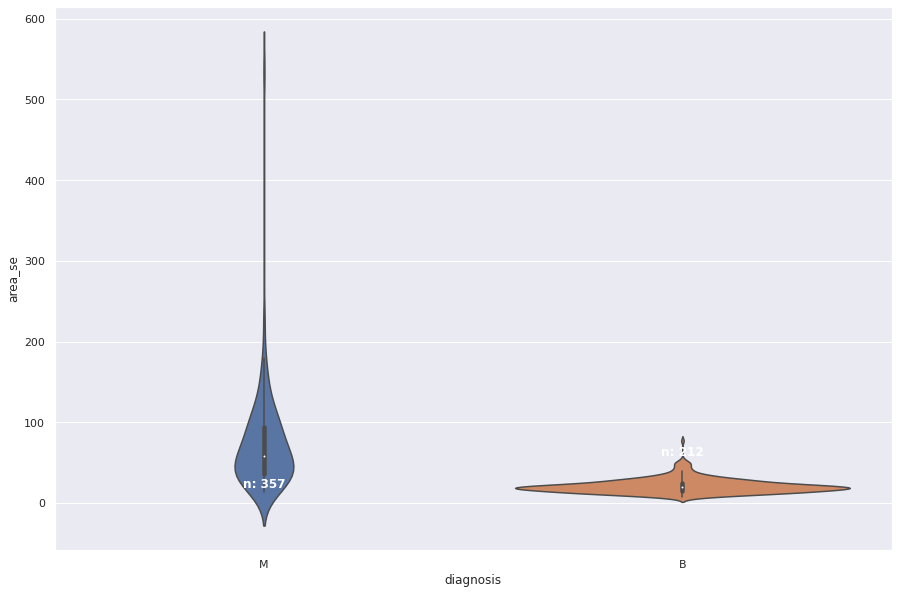

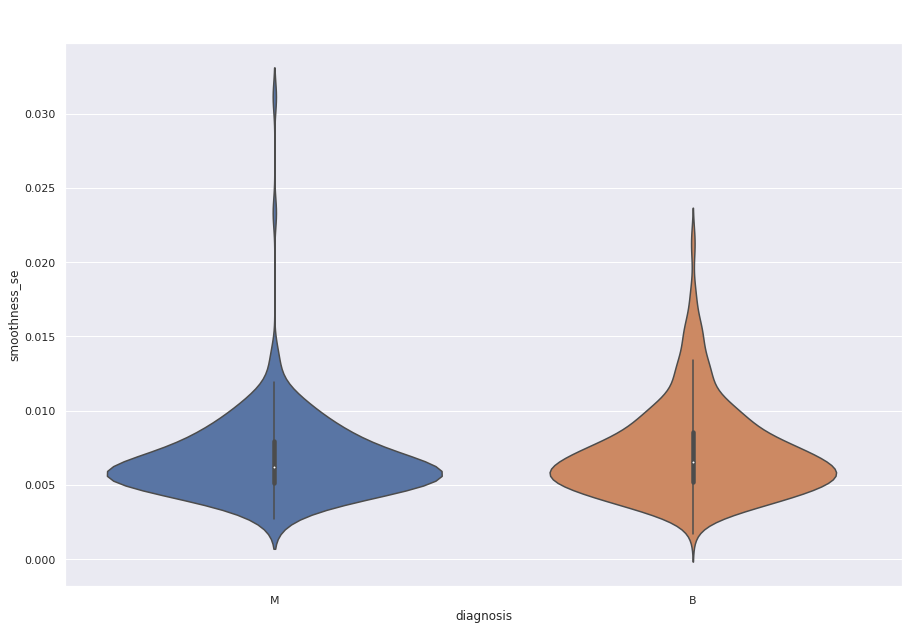

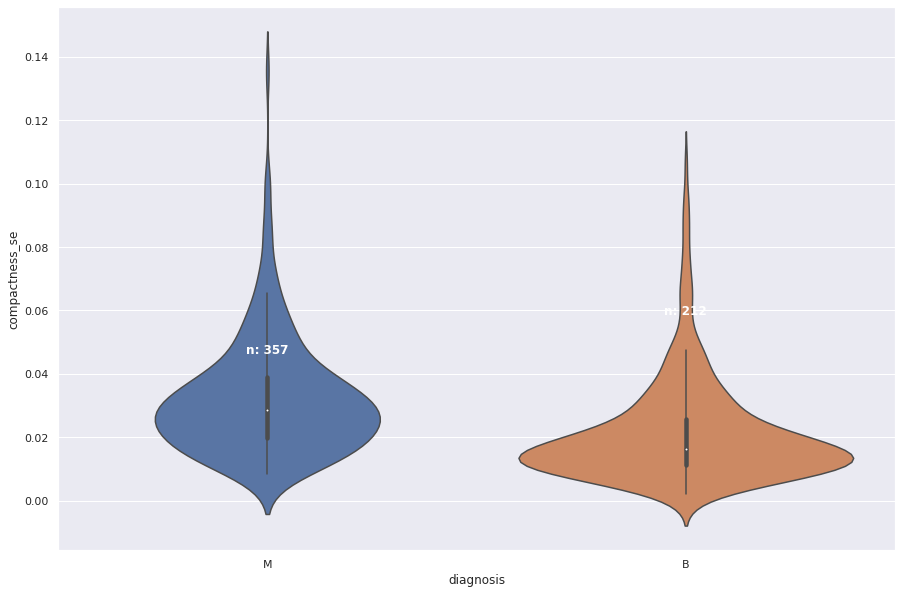

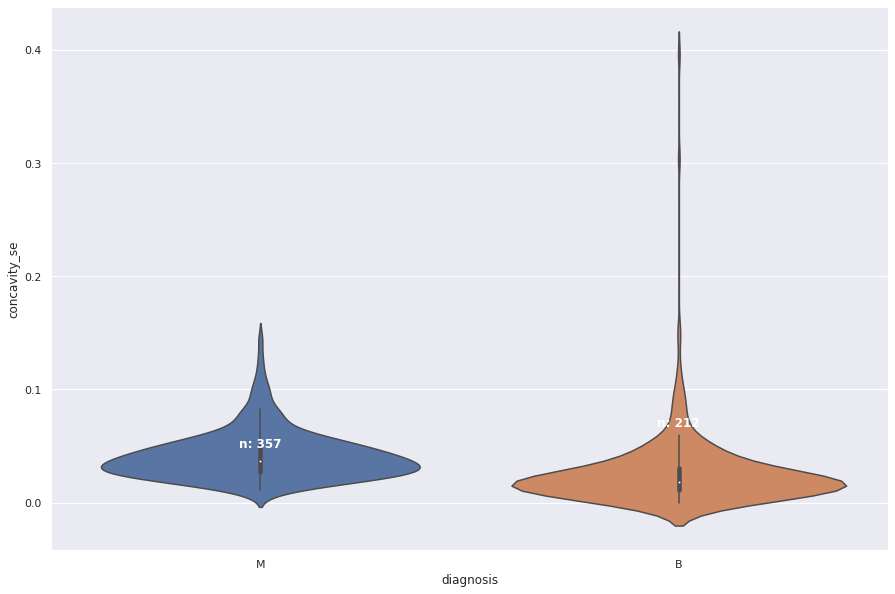

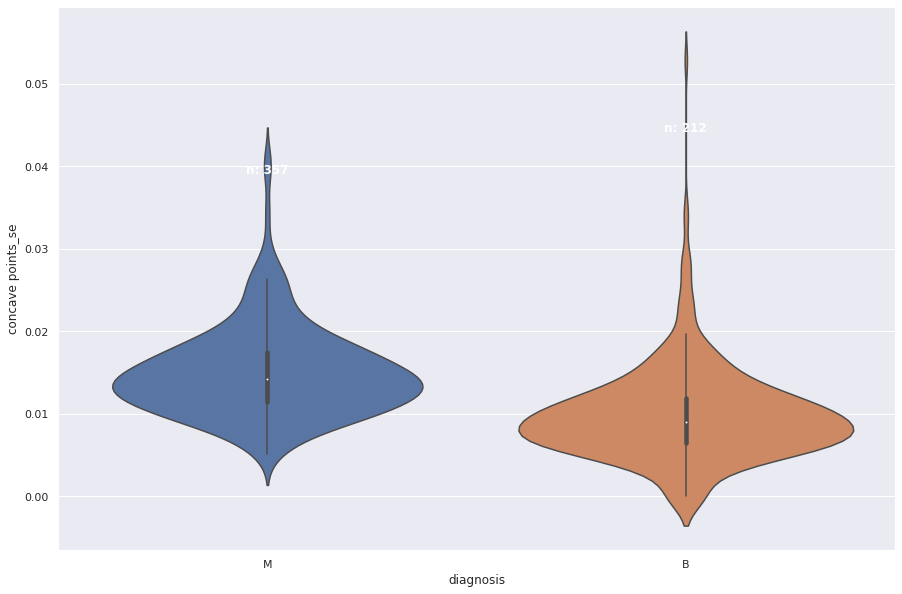

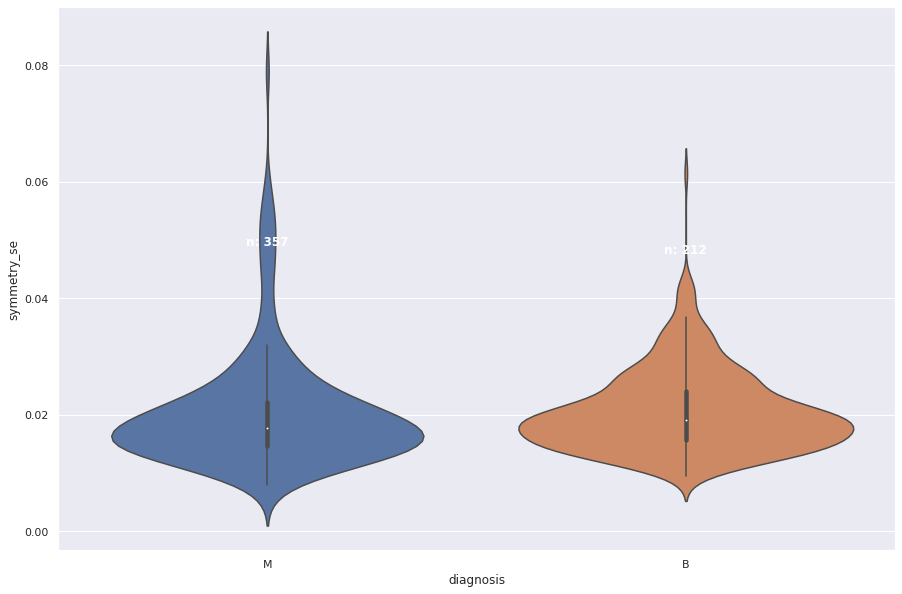

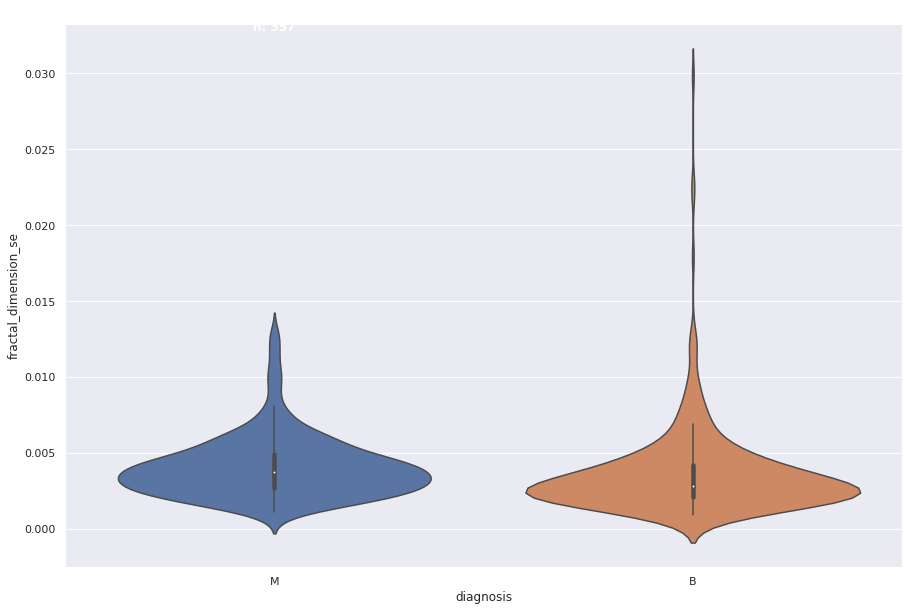

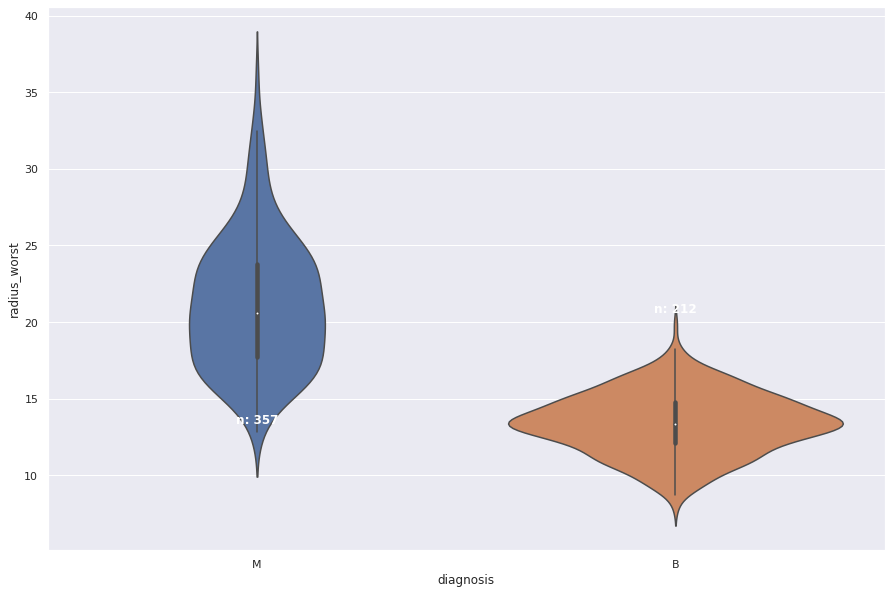

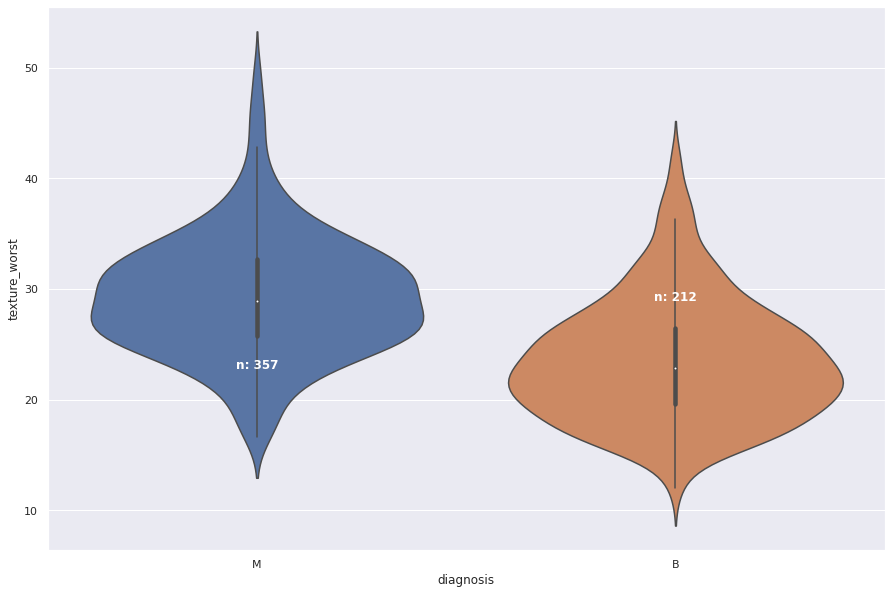

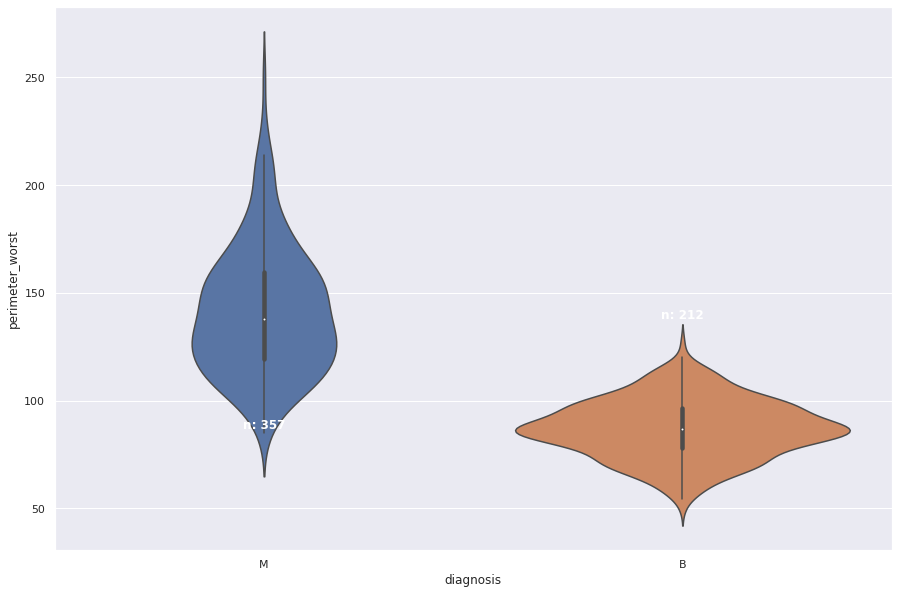

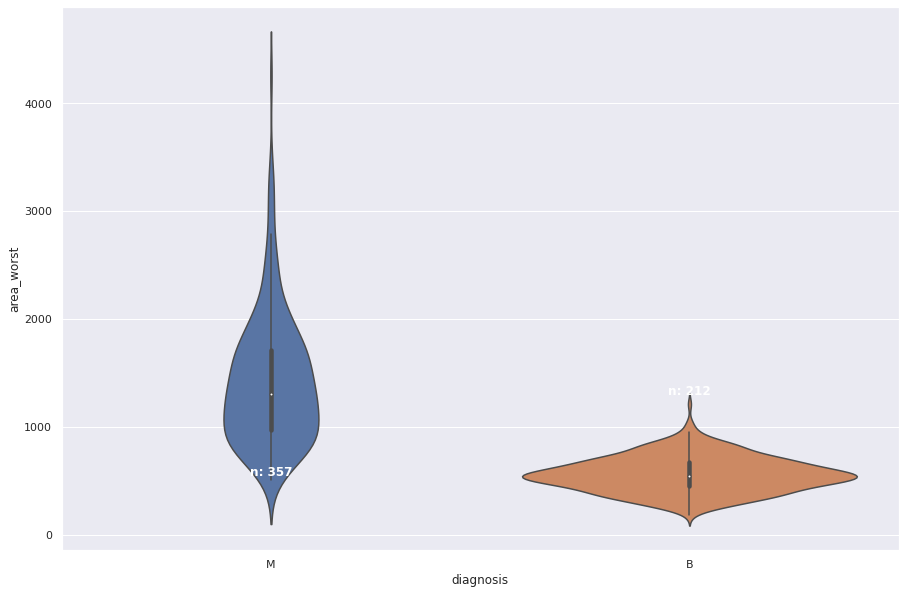

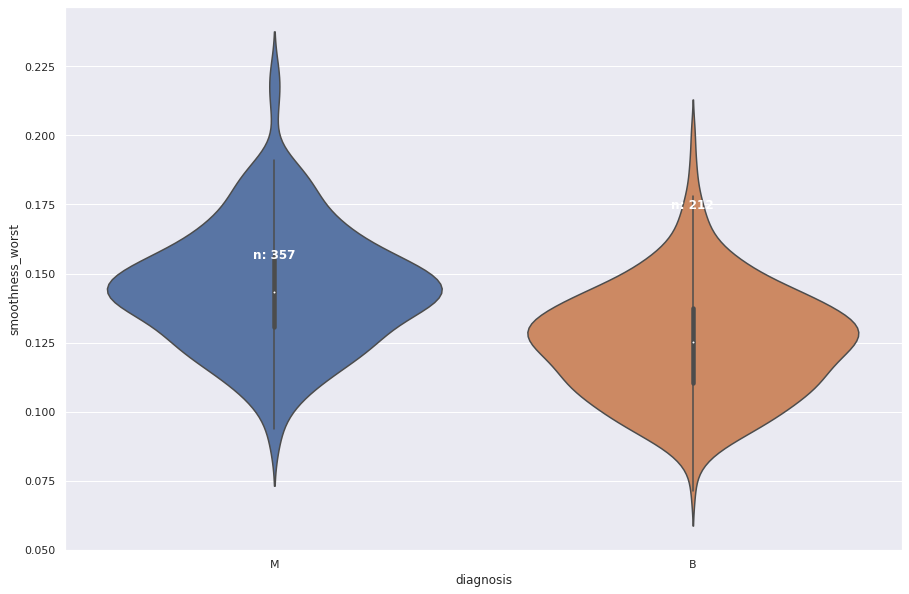

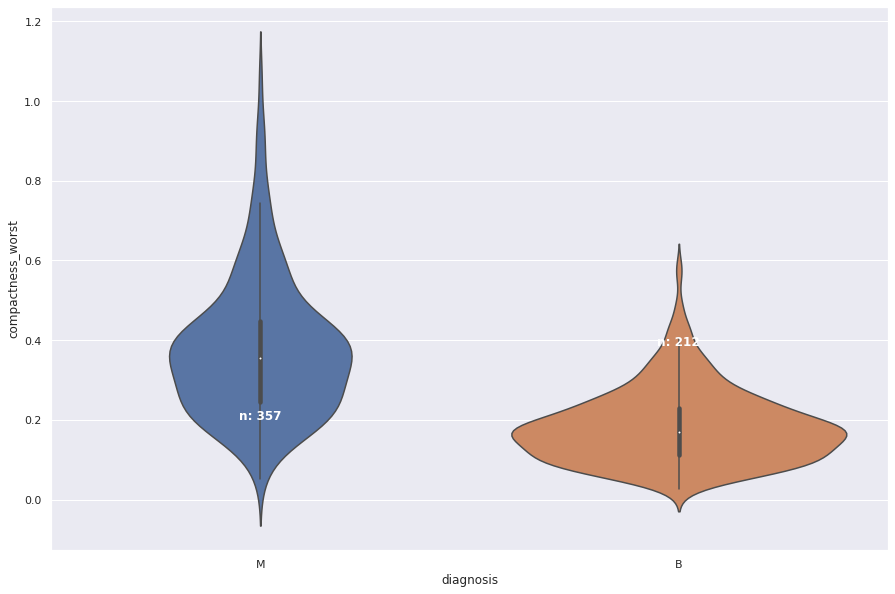

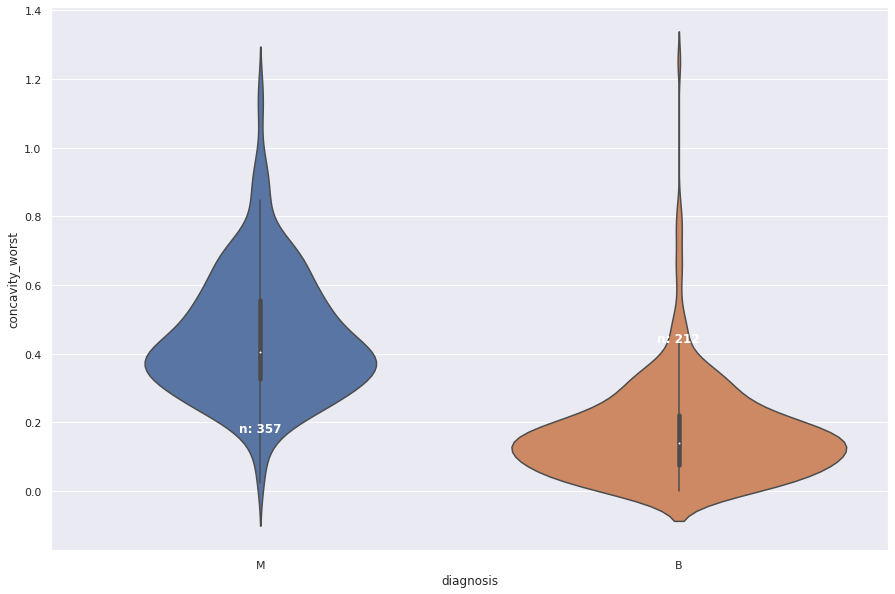

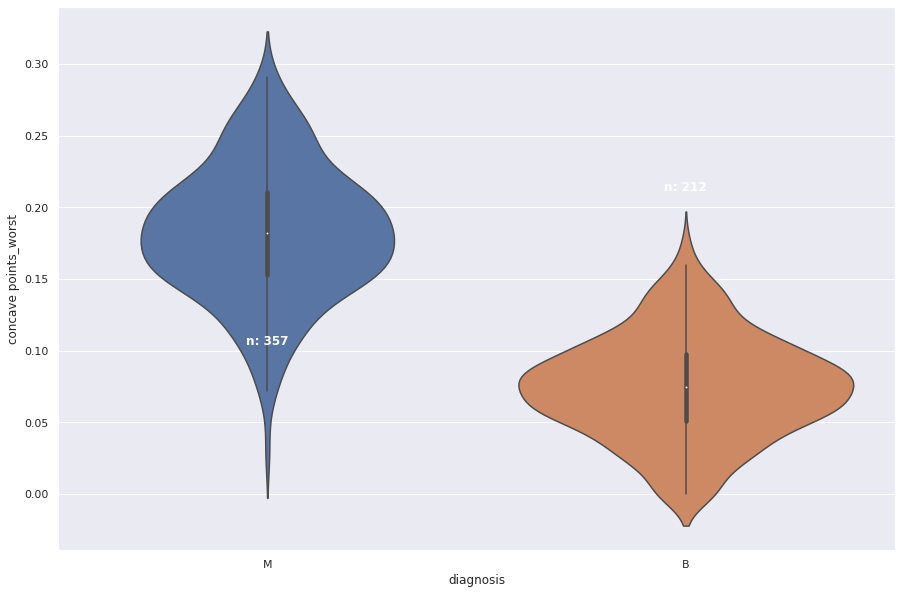

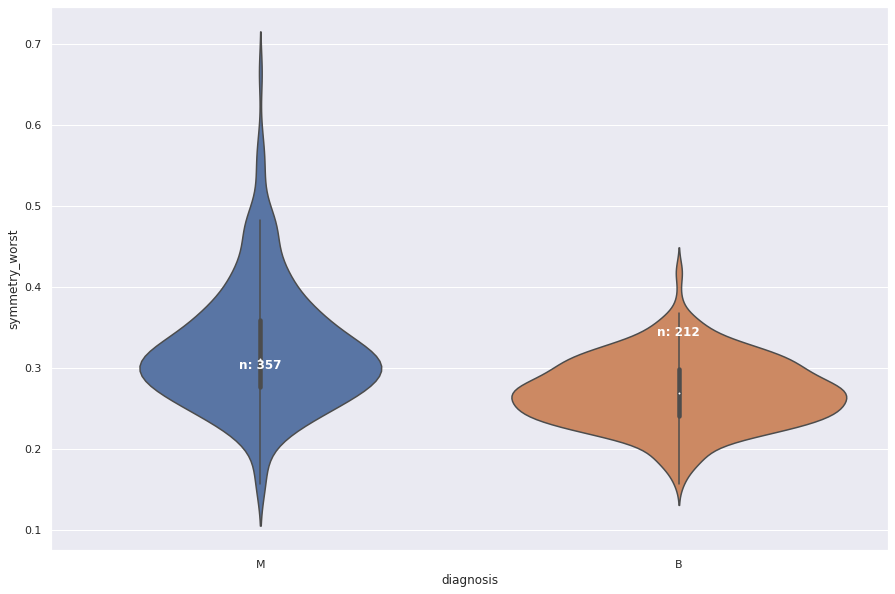

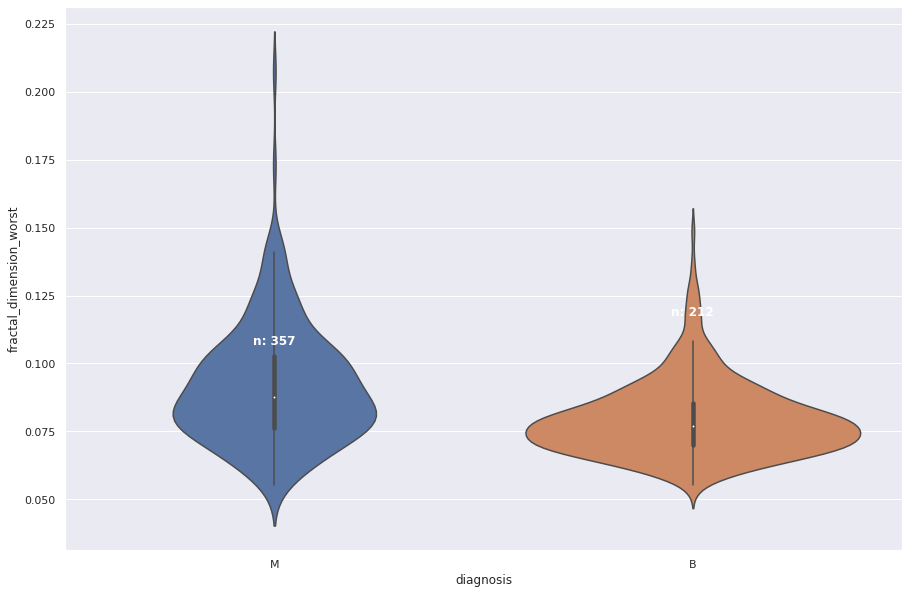

In [ ]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,10)})

for col in temp_df.columns:

# Basic violinplot stored in a matplotlib.axes object
  ax = sns.violinplot(x="diagnosis", y=col, data=df)
  
  # Calculate number of obs per group & median to position labels
  medians = df.groupby(['diagnosis'])[col].median().values
  nobs = df['diagnosis'].value_counts().values
  nobs = [str(x) for x in nobs.tolist()]
  nobs = ["n: " + i for i in nobs]
  
  # Add text to the figure
  pos = range(len(nobs))
  for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
              horizontalalignment='center',
              size='medium',
              color='w',
              weight='semibold')
  plt.show()

In [ ]:
def comparison_plot_maker(data_1, data_2, name, column_name_1, column_name_2):
    # Scaling Data for testing
    # data_1 = scale(data_1)
    # data_2 = scale(data_2)

    range =  np.random.randn(len(data_1))
    plt.scatter(range, data_1, label=column_name_1, color='orange')
    plt.scatter(range, data_2, label=column_name_2, color='green')
    plt.title(name)
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.legend()
    plt.show()

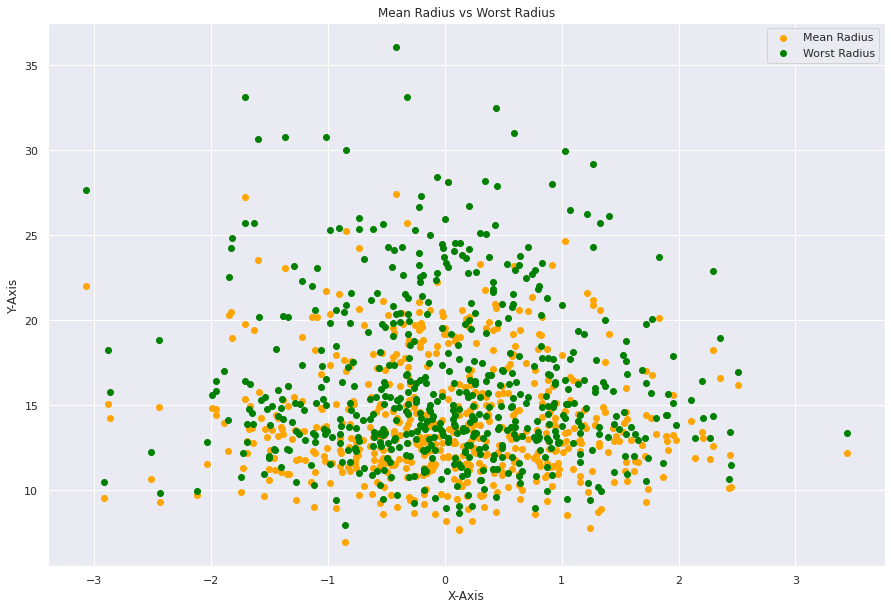

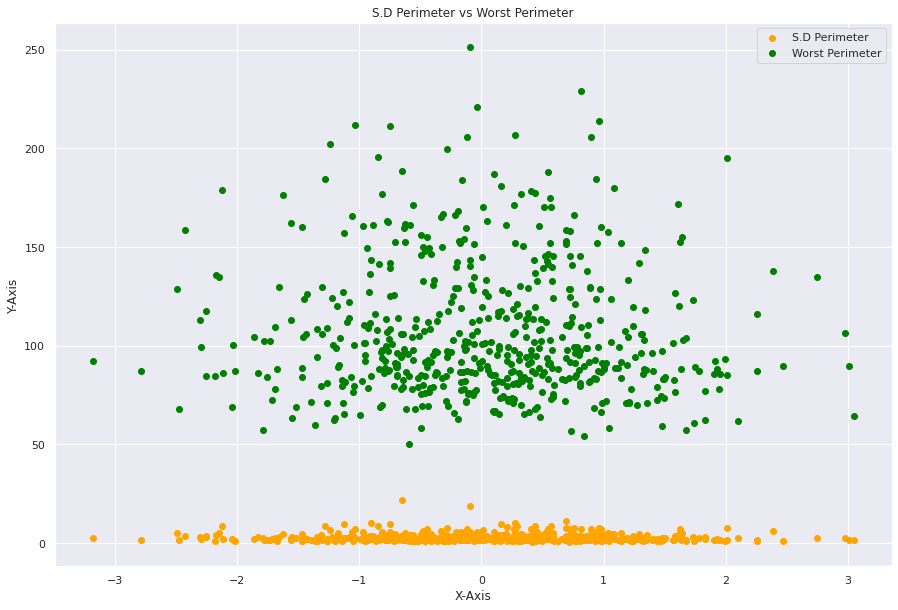

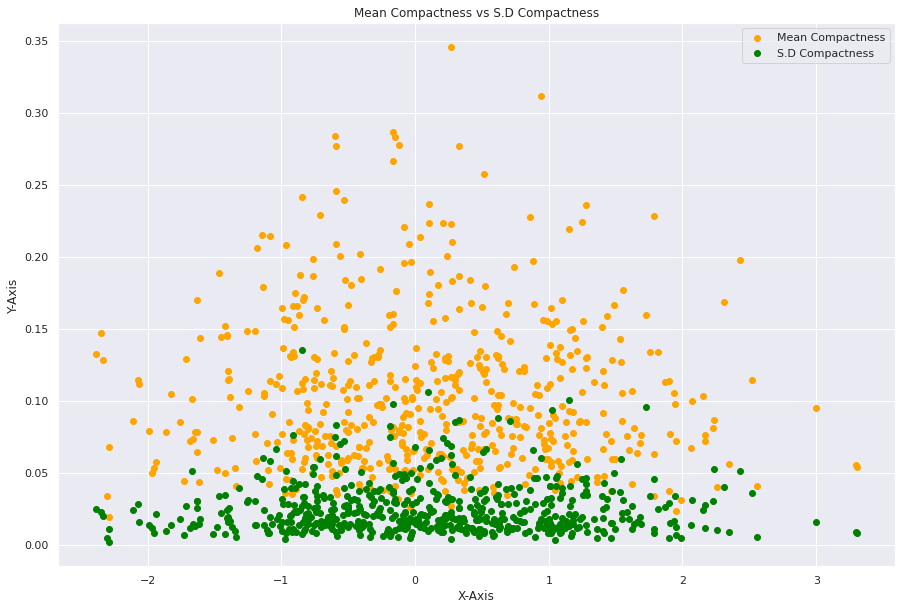

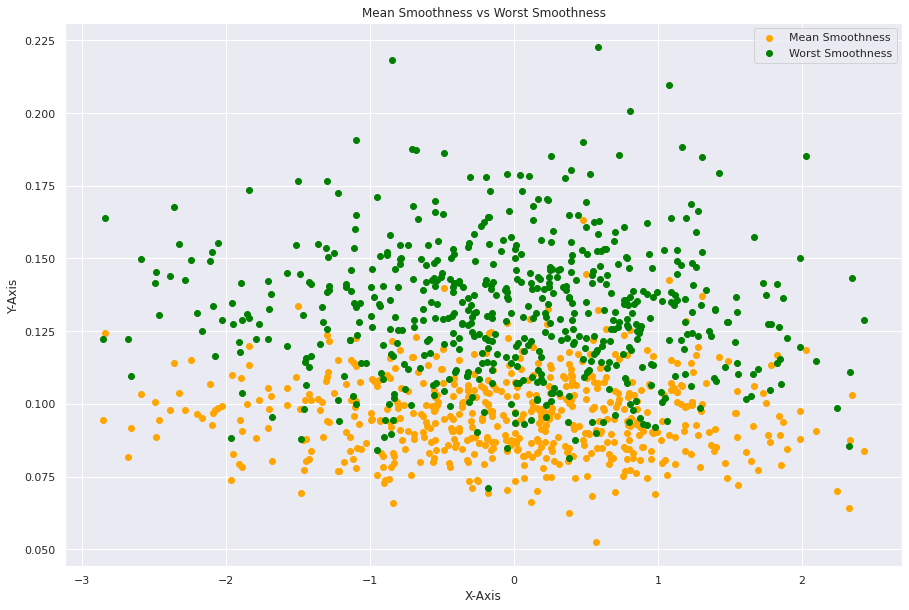

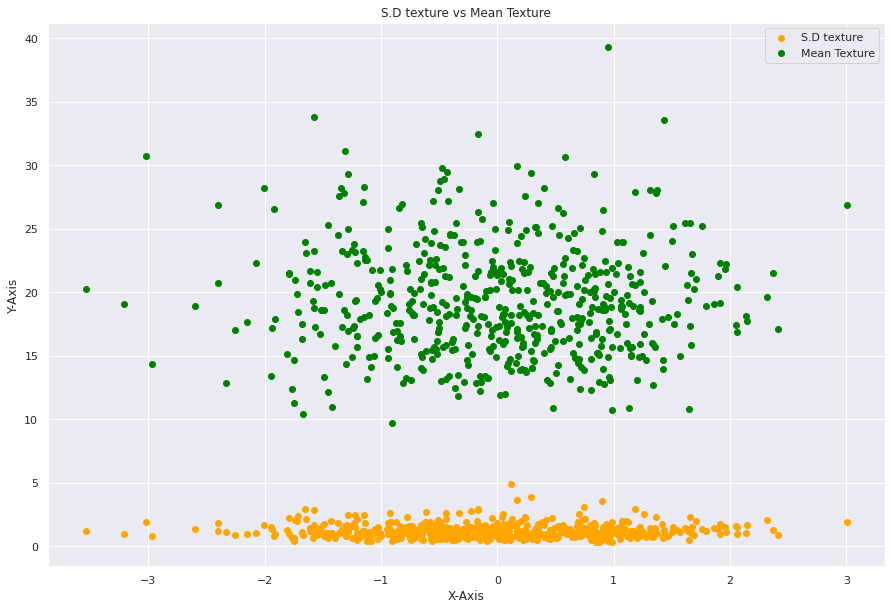

In [ ]:
comparison_plot_maker(df["radius_mean"], df["radius_worst"], "Mean Radius vs Worst Radius", "Mean Radius", "Worst Radius")
comparison_plot_maker(df["perimeter_se"], df["perimeter_worst"], "S.D Perimeter vs Worst Perimeter", "S.D Perimeter", "Worst Perimeter")
comparison_plot_maker(df["compactness_mean"], df["compactness_se"], "Mean Compactness vs S.D Compactness", "Mean Compactness", "S.D Compactness")
comparison_plot_maker(df["smoothness_mean"], df["smoothness_worst"], "Mean Smoothness vs Worst Smoothness","Mean Smoothness", "Worst Smoothness")
comparison_plot_maker(df["texture_se"], df["texture_mean"], "S.D texture vs Mean Texture", "S.D texture", "Mean Texture")

In [ ]:
##When independent variables are highly correlated, change in one variable would cause change to another and so the model results fluctuate significantly
## Fazer aqui scatterplots para comparar variaveis independentes correlacionadas (a partir do corr plot)

# Funções de seleção de variaveis, one hot encoding e treino de modelos

## One hot encoding

In [ ]:
labels = {"B":0,"M":1}
label_list = list(df['diagnosis'].map(labels)) #guardar lista / array com as labels por ordem em 0 e 1 de acordo com o dicionario labels
df.insert(loc=1,column = 'diagnosis OHE', value = label_list) #inserir no indice 1 a nova coluna OHE
df['diagnosis OHE'].value_counts()
df

diagnosis  diagnosis OHE  radius_mean  texture_mean  perimeter_mean  \
0           M              1        17.99         10.38          122.80   
1           M              1        20.57         17.77          132.90   
2           M              1        19.69         21.25          130.00   
3           M              1        11.42         20.38           77.58   
4           M              1        20.29         14.34          135.10   
..        ...            ...          ...           ...             ...   
564         M              1        21.56         22.39          142.00   
565         M              1        20.13         28.25          131.20   
566         M              1        16.60         28.08          108.30   
567         M              1        20.60         29.33          140.10   
568         B              0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.14710  ...        25.380          17.33           184.60   
1                0.07017  ...        24.990          23.41           158.80   
2                0.12790  ...        23.570          25.53           152.50   
3                0.10520  ...        14.910          26.50            98.87   
4                0.10430  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
564              0.13890  ...        25.450          26.40           166.10   
565              0.09791  ...        23.690          38.25           155.00   
566              0.05302  ...        18.980          34.12           126.70   
567              0.15200  ...        25.740          39.42           184.60   
568              0.00000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

## Feature selection

In [ ]:
def feature_selector(classifier,data,n_features, direction,scoring,cv):

  X_dataframe_scaled = StandardScaler().fit_transform(data.iloc[:,2:]) #guardar apenas dados da dataframe que sao as features
  y_dataframe = data.iloc[:,1] #guardar diagnosis OHE

  sfs = SequentialFeatureSelector(classifier, 
          n_features_to_select=n_features, 
          direction=direction, 
          scoring=scoring,
          cv=cv)
  
  sfs = sfs.fit(X_dataframe_scaled, y_dataframe)
  selected_features = [col for col in sfs.get_feature_names_out(data.columns[2:32])]
  return data.loc[:,selected_features]
  


## Testing e training split


In [ ]:

#training e testing
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["diagnosis","diagnosis OHE"]),
    df["diagnosis OHE"],
    random_state = 42,
    test_size = 0.25,
    stratify=df["diagnosis OHE"])

# Stratify = Faz com que dados de treino e teste tenham as mesmas proporçoes de B e M
  


## Funçao para treinar os modelos

In [ ]:
kfold = KFold(n_splits=10,random_state=42, shuffle= True)
# Função para treinar os modelos
def Average(lst): 
	return sum(lst) / len(lst)
 
seed = 42
scoring = ["accuracy","precision","recall","f1"]
kfold = KFold(n_splits=10,random_state=seed, shuffle= True)

def train_model(classifier, X_training, y_training, X_testing, y_testing, kfold, scoring, is_neural_net = False, k_fold_cv =False, cm=True, is_tree=False, is_xgboost = False,is_pca=False):
    X = df.drop(columns=["diagnosis","diagnosis OHE"])
    y = df["diagnosis OHE"]

    if is_tree:
      model = classifier.fit(X_training,y_training) 
      predictions = model.predict(X_testing)

    elif is_xgboost:
      model = classifier.fit(X_training,y_training, early_stopping_rounds=5, eval_set = [(X_testing, y_testing)]) 
      print("best score: {0}, best iteration: {1}, best ntree limit {2}".format(model.best_score, model.best_iteration, model.best_ntree_limit))
      predictions = model.predict(X_testing)

    elif is_pca:
      model = classifier.fit(X_training,y_training) 
      predictions = model.predict(X_testing)

    elif is_neural_net:
      model = classifier.fit(X_training,to_categorical(y_training), epochs=200, verbose=0)
      score = classifier.evaluate(X_testing,to_categorical(y_testing),verbose=0)
      print('Test Accuracy:', score[1])
      predictions = classifier.predict(X_testing)
      predictions = np.argmax(predictions,axis=1)
      #y_test_index = y_test.values

    else:
      #Make pipeline para standardizar os dados -> evitar bias
      model = Pipeline(steps=[('standard scalar',StandardScaler()),("classifier",classifier)])

      #fazer fit ao classificador escolhido
      model = model.fit(X_training, y_training)

    # fazer as prediçoes no dataset de teste
      predictions = model.predict(X_testing)

    if k_fold_cv and not is_neural_net:
     
      cv_results = cross_validate(model, X, y, cv= kfold, scoring=scoring)
      #msg = cv_results.mean()
      msg = {name:Average(score) for (name,score) in cv_results.items()} #guardar scores medios de cada um dos 10 k folds
      for key, value in msg.items():
        print("Mean {} : {}".format(key,value))

    if cm:
      conf_mat = confusion_matrix(y_true=y_testing, y_pred=predictions)
      sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=True)
      plt.show()
    print(classification_report(y_pred=predictions,y_true=y_testing))
    return (model,accuracy_score(y_pred=predictions, y_true=y_testing, normalize=True)) #y_test do split

# ML Models

## XGBOOST

In [ ]:
xgboost=xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100, eval_metric = ["auc","error","rmse"], learning_Rate=0.01, max_depth=5,reg_lambda=1)


In [ ]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    df.drop(columns=["diagnosis","diagnosis OHE"]),
    df["diagnosis OHE"],
    random_state = 42,
    test_size = 0.25,
    stratify=df["diagnosis OHE"])

[0]	validation_0-auc:0.901677	validation_0-error:0.118881	validation_0-rmse:0.463439
Multiple eval metrics have been passed: 'validation_0-rmse' will be used for early stopping.

Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-auc:0.970335	validation_0-error:0.090909	validation_0-rmse:0.427767
[2]	validation_0-auc:0.971488	validation_0-error:0.083916	validation_0-rmse:0.39678
[3]	validation_0-auc:0.979245	validation_0-error:0.083916	validation_0-rmse:0.37083
[4]	validation_0-auc:0.980294	validation_0-error:0.076923	validation_0-rmse:0.346153
[5]	validation_0-auc:0.993291	validation_0-error:0.055944	validation_0-rmse:0.323549
[6]	validation_0-auc:0.992872	validation_0-error:0.055944	validation_0-rmse:0.304215
[7]	validation_0-auc:0.992872	validation_0-error:0.048951	validation_0-rmse:0.285903
[8]	validation_0-auc:0.992034	validation_0-error:0.041958	validation_0-rmse:0.270535
[9]	validation_0-auc:0.992034	validation_0-error:0.041958	validation_0-rmse:0.2

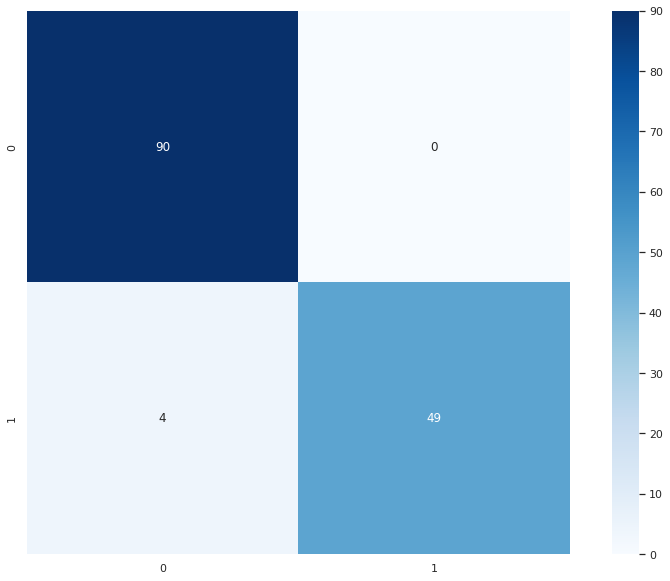

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.92      0.96        53

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
xgb_model = train_model(xgboost, X_training=X_train_xgb, y_training = y_train_xgb, X_testing = X_test_xgb, y_testing=y_test_xgb, kfold=kfold, scoring=scoring,is_tree =False, k_fold_cv=False,cm=True, is_xgboost = True)


### Grid search XGBoost

Nota: Correr o código vai levar a resultados diferentes dos apresentados no relatório. Este exemplo foi apenas didático para implementar GridSearch com XGBoost. Não exploramos com mais detalhe outros atributos pelo tempo que demora a fazer a procura dos parametros

In [ ]:
params = {
    "colsample_bytree": np.arange(0,1,0.2),
    "gamma": np.random.uniform(0,10,1),
    "learning_rate": np.random.uniform(0.03, 10,1), # default 0.1 
    "max_depth": [1,2,3,4,5,6,7,8,9,10], # default 3
    "n_estimators": [20,30,40,50,60,70,80,90,100,110,120,130,140,150], # default 100
    "subsample": [0.6,0.5,0.4]
}
X = df.drop(columns=["diagnosis","diagnosis OHE"])
y = df["diagnosis OHE"]
search = GridSearchCV(xgb_model[0],param_grid= params, scoring="roc_auc",cv=3, verbose=1, n_jobs=3, return_train_score=True)
search.fit(X, y)
print(search.best_score_)
print(search.best_params_)

Fitting 3 folds for each of 2100 candidates, totalling 6300 fits
0.7926911609714309
{'colsample_bytree': 0.8, 'gamma': 9.685290018503407, 'learning_rate': 8.665215158025081, 'max_depth': 2, 'n_estimators': 90, 'subsample': 0.5}


In [ ]:
xgboost_optimized=xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=130, eval_metric = ["auc","error","rmse"], learning_Rate=2.88,reg_lambda=1, colsample_bytree = 0.2,gamma=1.723733, max_depth=3,subsample = 0.6)

[0]	validation_0-auc:0.887212	validation_0-error:0.104895	validation_0-rmse:0.465591
Multiple eval metrics have been passed: 'validation_0-rmse' will be used for early stopping.

Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-auc:0.924004	validation_0-error:0.090909	validation_0-rmse:0.435003
[2]	validation_0-auc:0.970021	validation_0-error:0.097902	validation_0-rmse:0.406334
[3]	validation_0-auc:0.986268	validation_0-error:0.06993	validation_0-rmse:0.377053
[4]	validation_0-auc:0.983753	validation_0-error:0.083916	validation_0-rmse:0.364333
[5]	validation_0-auc:0.984172	validation_0-error:0.06993	validation_0-rmse:0.344436
[6]	validation_0-auc:0.985639	validation_0-error:0.06993	validation_0-rmse:0.325371
[7]	validation_0-auc:0.986268	validation_0-error:0.055944	validation_0-rmse:0.31001
[8]	validation_0-auc:0.986897	validation_0-error:0.055944	validation_0-rmse:0.294704
[9]	validation_0-auc:0.989413	validation_0-error:0.062937	validation_0-rmse:0.278

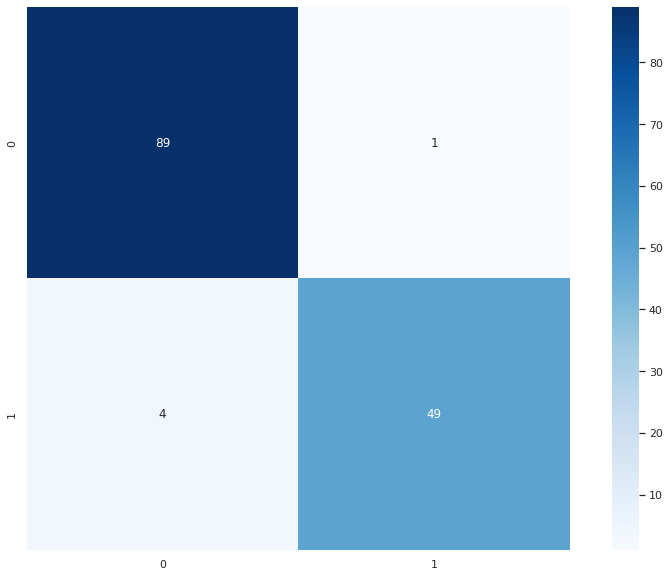

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        90
           1       0.98      0.92      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [ ]:
xgb_model_optimized = train_model(xgboost_optimized, X_training=X_train_xgb, y_training = y_train_xgb, X_testing = X_test_xgb, y_testing=y_test_xgb, kfold=kfold, scoring=scoring,is_tree =False, k_fold_cv=False,cm=True, is_xgboost = True)


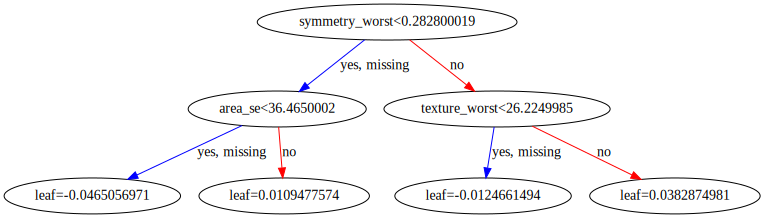

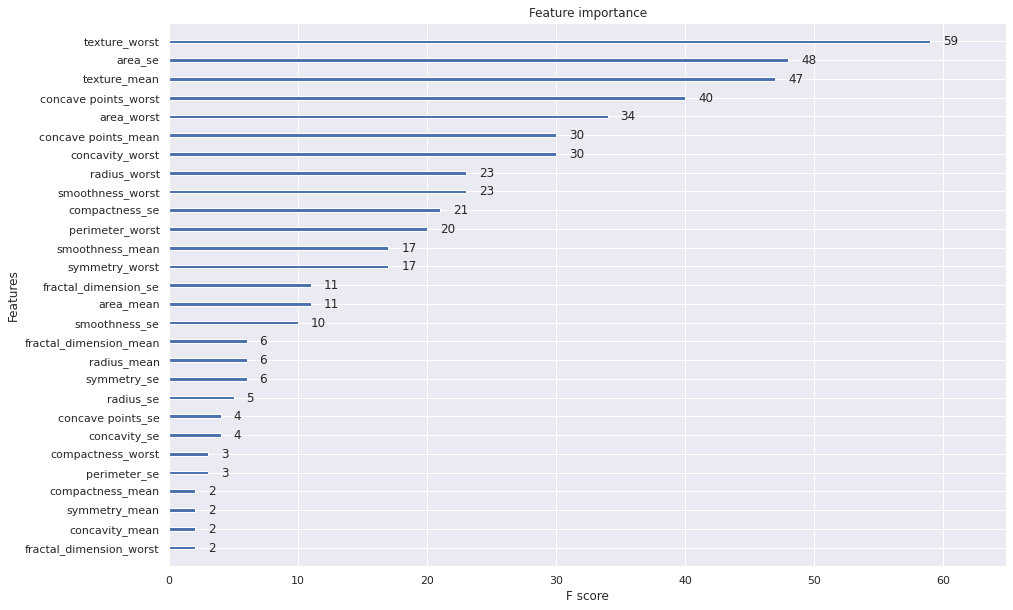

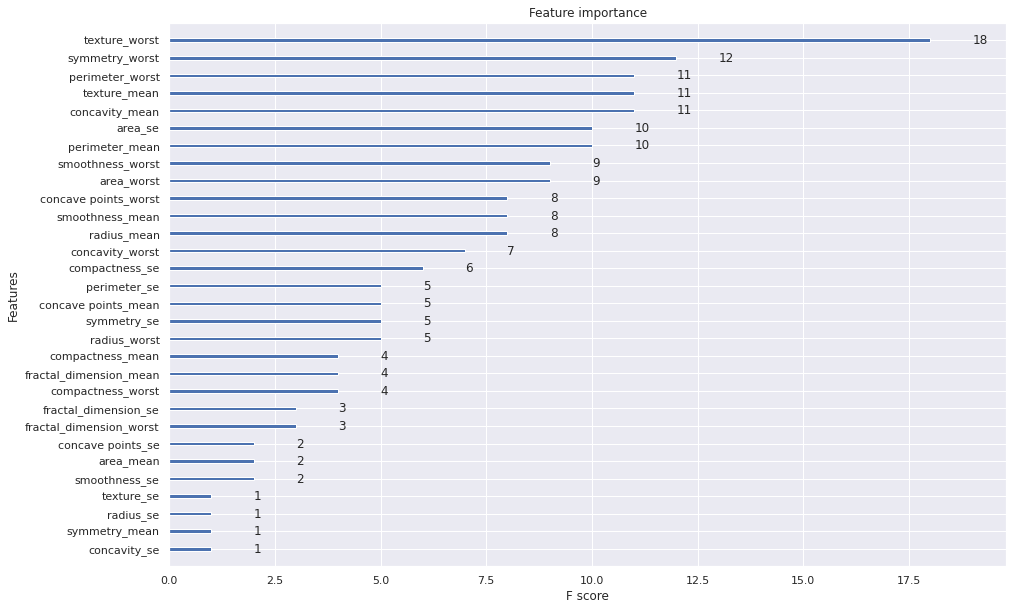

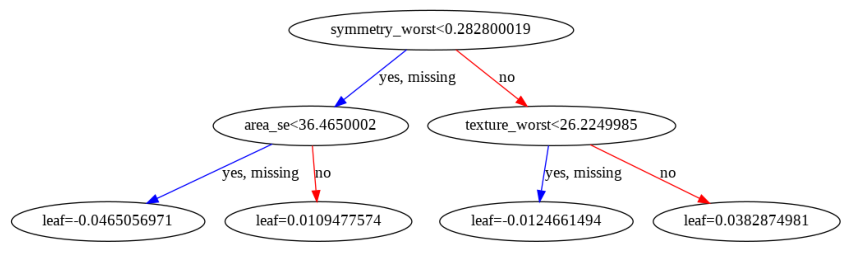

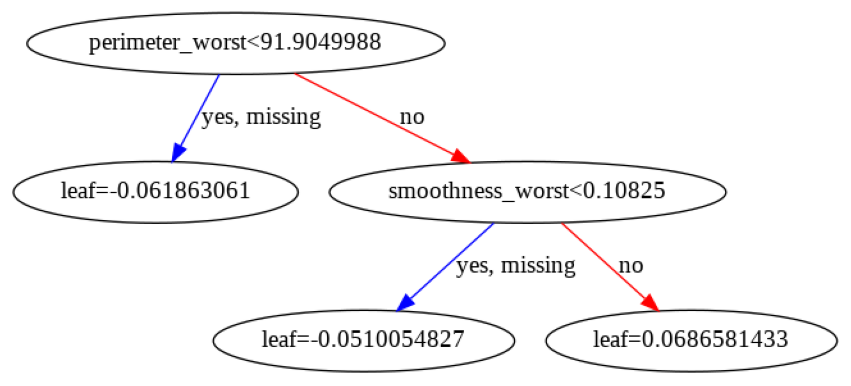

In [ ]:
# requires graphviz and python-graphviz conda packages
import graphviz
xgb.plot_importance(xgb_model[0])
xgb.plot_importance(xgb_model_optimized[0])

# plot the output tree via matplotlib, specifying the ordinal number of the target tree
xgb.plot_tree(xgb_model[0], num_trees=xgb_model[0].best_iteration)
xgb.plot_tree(xgb_model_optimized[0], num_trees=xgb_model_optimized[0].best_iteration)

# converts the target tree to a graphviz instance
xgb.to_graphviz(xgb_model[0], num_trees=xgb_model[0].best_iteration,model_output="probability")


## Decision Tree

In [ ]:
tree = DecisionTreeClassifier(max_depth=3, max_features = 12, criterion = "gini", splitter = "best", random_state=42)

In [ ]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    df.drop(columns=["diagnosis","diagnosis OHE"]),
    df["diagnosis OHE"],
    random_state = 42,
    test_size = 0.25,
    stratify=df["diagnosis OHE"])

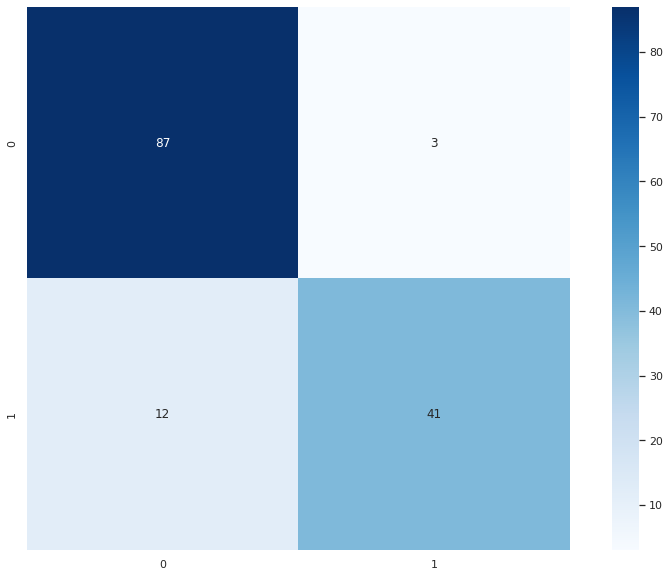

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        90
           1       0.93      0.77      0.85        53

    accuracy                           0.90       143
   macro avg       0.91      0.87      0.88       143
weighted avg       0.90      0.90      0.89       143



In [ ]:
decision_tree = train_model(tree, X_training=X_train_tree, y_training = y_train_tree, X_testing = X_test_tree, y_testing=y_test_tree, kfold=kfold, scoring=scoring,cm=True, is_tree=True)


[Text(0.5, 0.875, 'radius_worst <= 112.8\nsamples = 426\nvalue = [267, 159]\nclass = B'),
 Text(0.25, 0.625, 'concavity_worst <= 0.363\n277\n[257, 20]\nB'),
 Text(0.125, 0.375, 'diagnosis <= 14.98\n267\n[255, 12]\nB'),
 Text(0.0625, 0.125, '259\n[251, 8]\nB'),
 Text(0.1875, 0.125, '8\n[4, 4]\nB'),
 Text(0.375, 0.375, 'radius_mean <= 66.63\n10\n[2, 8]\nM'),
 Text(0.3125, 0.125, '2\n[2, 0]\nB'),
 Text(0.4375, 0.125, '8\n[0, 8]\nM'),
 Text(0.75, 0.625, 'compactness_mean <= 0.05\n149\n[10, 139]\nM'),
 Text(0.625, 0.375, 'fractal_dimension_se <= 26.03\n18\n[8, 10]\nM'),
 Text(0.5625, 0.125, '6\n[6, 0]\nB'),
 Text(0.6875, 0.125, '12\n[2, 10]\nM'),
 Text(0.875, 0.375, 'symmetry_se <= 17.56\n131\n[2, 129]\nM'),
 Text(0.8125, 0.125, '14\n[2, 12]\nM'),
 Text(0.9375, 0.125, '117\n[0, 117]\nM')]

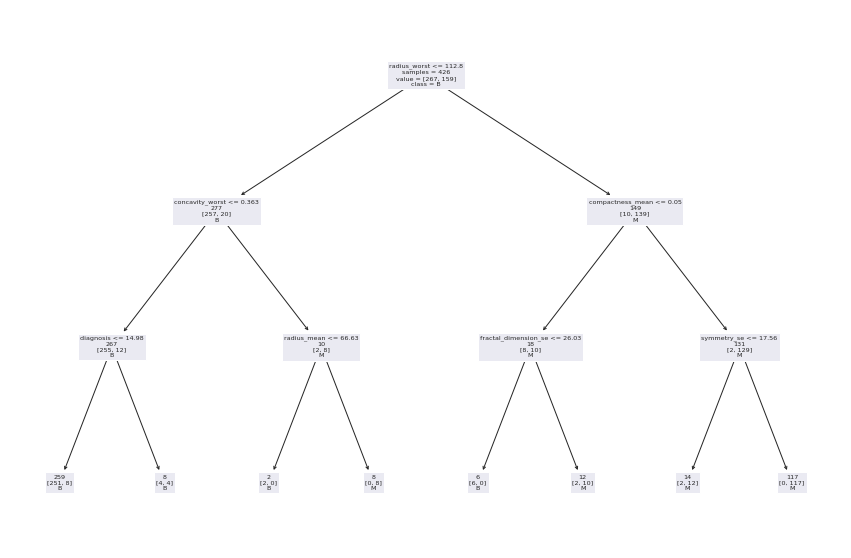

In [ ]:
plot_tree(decision_tree[0], feature_names=list(df.columns), impurity=False, class_names=['B', 'M'], label='root')


## Logistic regression

In [ ]:
logistic=LogisticRegression()


In [ ]:
logisticSelectedFeatures = feature_selector(logistic, df, 20,'forward','accuracy',10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    logisticSelectedFeatures,
    df["diagnosis OHE"],
    random_state = 42,
    test_size = 0.25,
    stratify=df["diagnosis OHE"])

Mean fit_time : 0.024097895622253417
Mean score_time : 0.007361316680908203
Mean test_accuracy : 0.975407268170426
Mean test_precision : 0.9766310098918793
Mean test_recall : 0.961604826546003
Mean test_f1 : 0.9681890212599994


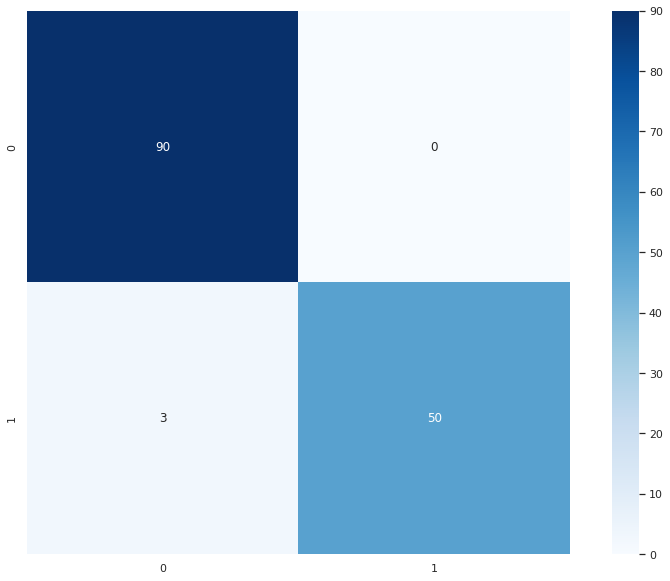

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [ ]:
lr_cv = train_model(logistic, X_training=X_train, y_training = y_train, X_testing = X_test, y_testing=y_test, kfold=kfold, scoring=scoring,k_fold_cv=True,cm=True)


## SVM

In [ ]:
svm = SVC()

In [ ]:
svmSelectedFeatures = feature_selector(svm, df, 20,'forward','accuracy',10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    svmSelectedFeatures,
    df["diagnosis OHE"],
    random_state = 42,
    test_size = 0.25,
    stratify=df["diagnosis OHE"])

Mean fit_time : 0.009872078895568848
Mean score_time : 0.0052764654159545895
Mean test_accuracy : 0.9736215538847117
Mean test_precision : 0.9732738709518894
Mean test_recall : 0.9528998615190567
Mean test_f1 : 0.9621539082909241


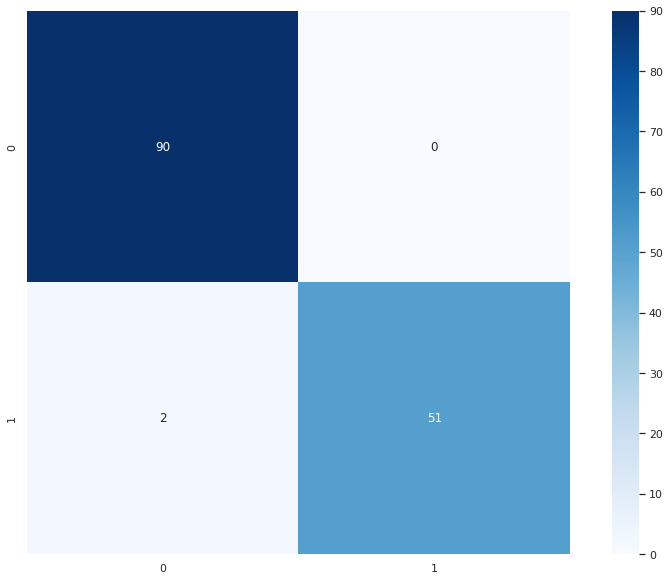

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        90
           1       1.00      0.96      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



In [ ]:
svm_cv = train_model(svm, X_training=X_train, y_training = y_train, X_testing = X_test, y_testing=y_test, kfold=kfold, scoring=scoring,k_fold_cv=True,cm=True)


## Naive bayes


In [ ]:
nb = GaussianNB()

In [ ]:
nbSelectedFeatures = feature_selector(nb, df, 20,'forward','accuracy',10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    nbSelectedFeatures,
    df["diagnosis OHE"],
    random_state = 42,
    test_size = 0.25,
    stratify=df["diagnosis OHE"])

Mean fit_time : 0.005625486373901367
Mean score_time : 0.004753923416137696
Mean test_accuracy : 0.9278508771929823
Mean test_precision : 0.9090381024204554
Mean test_recall : 0.8895593571661683
Mean test_f1 : 0.8972560297229094


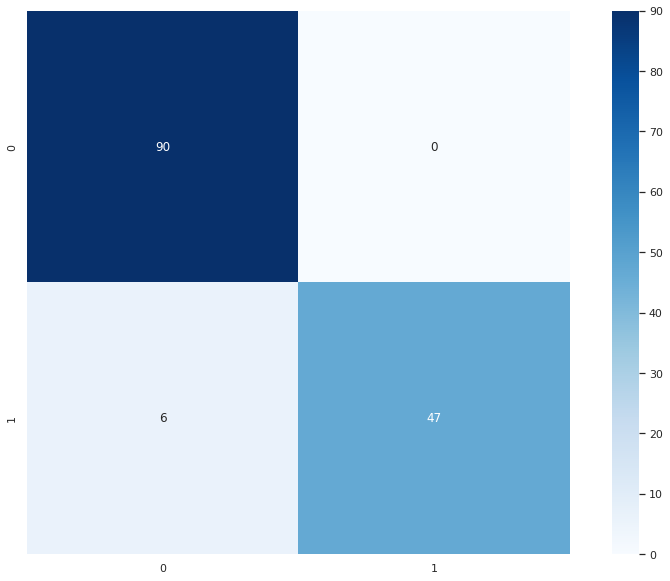

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        90
           1       1.00      0.89      0.94        53

    accuracy                           0.96       143
   macro avg       0.97      0.94      0.95       143
weighted avg       0.96      0.96      0.96       143



In [ ]:
nb_cv = train_model(nb, X_training=X_train, y_training = y_train, X_testing = X_test, y_testing=y_test, kfold=kfold, scoring=scoring,k_fold_cv=True,cm=True)


## Principal Component Regression (classification)

* Uma vez que temos varias variaveis correlacionadas entre si, podemos aplicar um PCA de modo a obter as componentes principais que explicam maior parte da variabilidade dos nossos dados. Estas componentes principais poderam ser usadas mais tarde como features para classificaçao

In [ ]:
#training e testing
X_train_pc, X_test_pc, y_train_pc, y_test_pc = train_test_split(
    df.drop(columns=["diagnosis","diagnosis OHE"]),
    df["diagnosis OHE"],
    random_state = 42,
    test_size = 0.25,
    stratify=df["diagnosis OHE"])

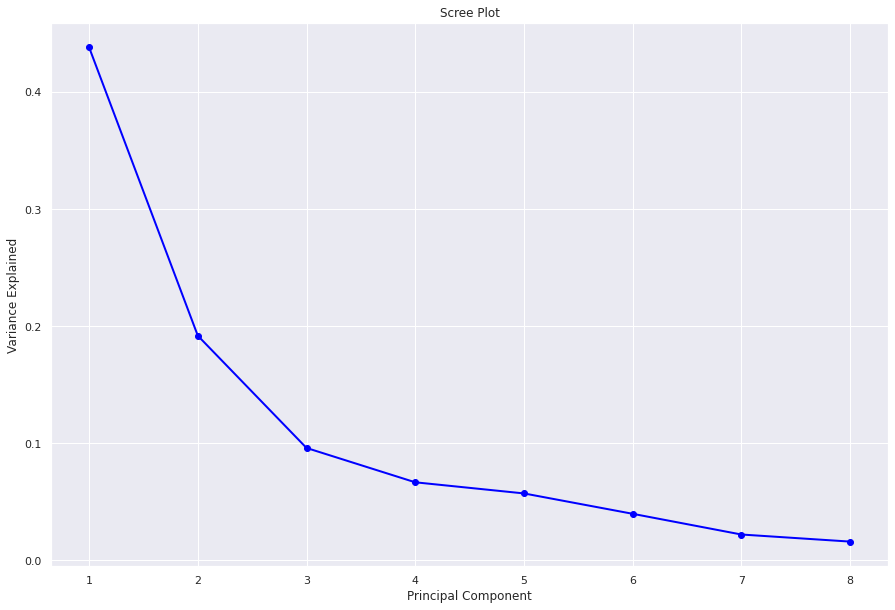

In [ ]:
#define scaler
scaler = StandardScaler()
#Scale training and testing data
X_train_scaled = scaler.fit_transform(X_train_pc)
X_test_scaled = scaler.fit_transform(X_test_pc)

#created scaled version of DataFrame

pca = PCA(n_components=8, random_state = 42)
pca_fitted = pca.fit_transform(X_train_scaled)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

### EDA | Ver quantas PC a incluir na regressao logistica usando CV

Best parameter (CV score=0.976):
{'logistic__C': 21.54434690031882, 'pca__n_components': 8}


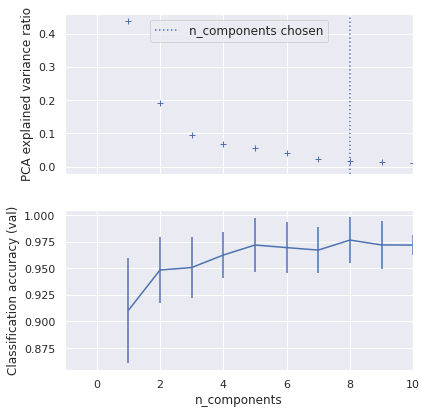

In [ ]:
## NOTA: ISTO VAI FAZER VALIAÇAO CRUZADA PARA VER QUAL O NUMERO OTIMO DE PC A ESCOLHER

  #podemos escolher PCs de acordo com os seguintes criterios:
    # Knee no grafico de scree plot
    # % de variabilidade
    # resultados usando CV onde o numero de PC será o hiperparametro a usar na grid search - este codigo faz isto. Podemos ver que o melhor resultado é com 8 PC

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic_pca = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("logistic", logistic_pca)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "pca__n_components": [i for i in range(1,11)],
    "logistic__C": np.logspace(-4, 4, 4),
}

search = GridSearchCV(pipe, param_grid, n_jobs=2, cv = 10)
search.fit(X_train_pc, y_train_pc)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit_transform(X_train_scaled)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 10)

plt.tight_layout()
plt.show()

8 componentes principais resultou em melhor accuracy. Iremos usar estas 8 para regressao logistica

### Aplicar PCA na dataframe original

In [ ]:
X=df.loc[:,~df.columns.isin(['diagnosis','diagnosis OHE'])]
X=StandardScaler().fit_transform(X) # standarize the variables
y = df["diagnosis"].factorize(['B','M'])[0]
pca=PCA(n_components=8)
PC=pca.fit_transform(X)
principalDF=pd.DataFrame(data=PC,columns=["pc{}".format(pc) for pc in range(1,9)])
finalDf = pd.concat([principalDF, df[['diagnosis OHE']]], axis = 1)
finalDf

pc1        pc2       pc3       pc4       pc5       pc6       pc7  \
0     9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411425  2.159374   
1     2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028656  0.013362   
2     5.733896  -1.075174 -0.551748  0.912083 -0.177086  0.541452 -0.668157   
3     7.122953  10.275589 -3.232790  0.152547 -2.960878  3.053421  1.429909   
4     3.935302  -1.948072  1.389767  2.940640  0.546747 -1.226495 -0.936228   
..         ...        ...       ...       ...       ...       ...       ...   
564   6.439315  -3.576817  2.459487  1.177314 -0.074824 -2.375193 -0.596124   
565   3.793382  -3.584048  2.088476 -2.506028 -0.510722 -0.246710 -0.716322   
566   1.256179  -1.902297  0.562731 -2.089227  1.809991 -0.534447 -0.192757   
567  10.374794   1.672010 -1.877029 -2.356031 -0.033742  0.567936  0.223077   
568  -5.475243  -0.670637  1.490443 -2.299157 -0.184703  1.617837  1.698950   

          pc8  diagnosis OHE  
0   -0.398425              1  
1    0.240977              1  
2    0.097340              1  
3    1.059572              1  
4    0.636428              1  
..        ...            ...  
564 -0.035489              1  
565 -1.113373              1  
566  0.341883              1  
567 -0.280224              1  
568  1.046358              0  

[569 rows x 9 columns]

### Fazer test e train split na dataframe com as componentes principais

In [ ]:
## Agora vamos dividir esta df de componentes princpais em training e test sets
X_pca = finalDf.iloc[:,0:8]
y_pca = finalDf[['diagnosis OHE']]
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,y_pca,test_size=0.25, stratify=y_pca)


### Aplicar regressao logistica nas componentes principais

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean fit_time : 0.009615373611450196
Mean score_time : 0.0051970243453979496
Mean test_accuracy : 0.9489661654135337
Mean test_precision : 0.9400623699772307
Mean test_recall : 0.920987130974747
Mean test_f1 : 0.9296075739041643


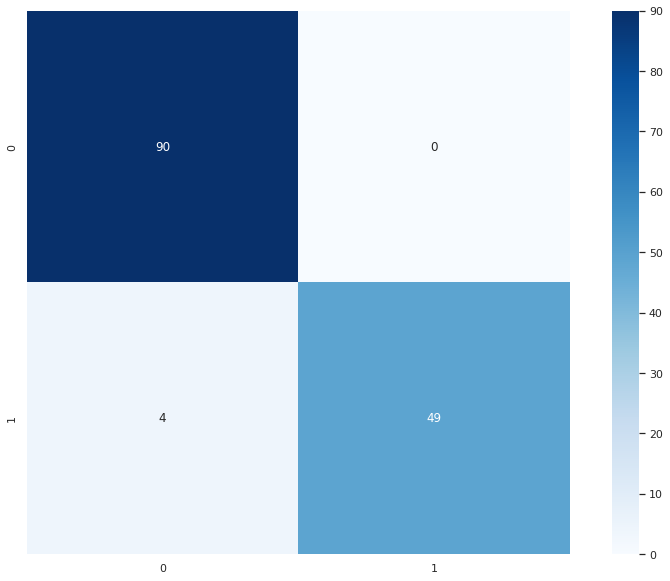

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.92      0.96        53

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
logistic_pca=LogisticRegression(solver="liblinear")
pca_logreg_model = train_model(logistic_pca, X_training=X_train_pca, y_training = y_train_pca, X_testing = X_test_pca, y_testing=y_test_pca, kfold=kfold, scoring=scoring,is_tree =False, k_fold_cv=True,cm=True, is_xgboost = False, is_pca=True)


##### Os resultados de teste estao de acordo com os resultsdos obtidos no cross validation grid search


##### Apesar de ter melhorado o score quando comparado com regressao logistica normal, perdemos interpretabilidade por usar PC em vez das variaveis originais. Para colmatar isto, poderiamos fazer um grafico de loading scores para ver quais as variaveis mais importantes

In [ ]:
PCloadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components=df.columns.tolist()
components=components[2:]
loadingdf=pd.DataFrame(PCloadings,columns=(["pc{}".format(pc) for pc in range(1,9)]))
loadingdf["variable"]=components
loadingdf

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0   0.798469 -0.558394 -0.014334  0.058328  0.048561  0.020610 -0.102056   
1   0.378346 -0.142564  0.108454 -0.849451 -0.063575 -0.035389  0.009375   
2   0.829965 -0.513800 -0.015649  0.059137  0.048032  0.019035 -0.094151   
3   0.806101 -0.551755  0.048220  0.075266  0.013277 -0.002076 -0.042482   
4   0.520110  0.444392 -0.175226  0.224505 -0.469197 -0.314945 -0.115692   
5   0.872817  0.362680 -0.124485  0.044786  0.015041 -0.015541  0.025428   
6   0.942542  0.143660  0.004593  0.026936  0.111006 -0.010276 -0.088429   
7   0.951490 -0.083016 -0.042951  0.092032 -0.056368 -0.057243 -0.123762   
8   0.503978  0.454506 -0.067609  0.094552 -0.393183  0.392020 -0.077220   
9   0.234772  0.875292 -0.037928  0.068439 -0.057092 -0.131346  0.243245   
10  0.751328 -0.252033  0.451089  0.137959 -0.198501 -0.028158  0.257005   
11  0.063570  0.214849  0.629441 -0.506889 -0.246301 -0.031615 -0.074641   
12  0.770833 -0.213602  0.448005  0.125354 -0.155492  0.001991  0.258773   
13  0.739987 -0.363638  0.362924  0.152417 -0.163953 -0.047140  0.285123   
14  0.053005  0.488130  0.518896  0.062914 -0.298241 -0.377128 -0.200695   
15  0.621527  0.555669  0.260053 -0.038693  0.359804  0.076101  0.019298   
16  0.560234  0.470883  0.296486  0.001855  0.454923  0.061964 -0.171745   
17  0.669033  0.311176  0.377459  0.104331  0.251310 -0.034340 -0.304012   
18  0.155017  0.438984  0.484865  0.062081 -0.324977  0.539155 -0.066109   
19  0.374128  0.668791  0.355358  0.021558  0.338379 -0.058502  0.157411   
20  0.831641 -0.524987 -0.079819  0.021717 -0.005663 -0.000320 -0.007986   
21  0.381062 -0.108565 -0.071067 -0.891367 -0.119370 -0.054997  0.008118   
22  0.863167 -0.477261 -0.081566  0.019442  0.009580  0.009349 -0.000366   
23  0.820238 -0.523759 -0.019998  0.036475 -0.035202 -0.027675  0.055789   
24  0.466720  0.411421 -0.436499  0.024865 -0.416951 -0.406094 -0.089507   
25  0.766346  0.342865 -0.396643 -0.128644  0.156538  0.052465  0.115531   
26  0.834453  0.233914 -0.290763 -0.104167  0.242277  0.031211 -0.049748   
27  0.915132 -0.019716 -0.286204  0.008461  0.055689 -0.033954 -0.138142   
28  0.448307  0.338783 -0.455846 -0.051062 -0.314297  0.548702 -0.015208   
29  0.480695  0.657443 -0.391125 -0.108537  0.121349 -0.088227  0.308134   

         pc8                 variable  
0  -0.005147              radius_mean  
1   0.090294             texture_mean  
2  -0.012910           perimeter_mean  
3   0.023960                area_mean  
4  -0.199678          smoothness_mean  
5  -0.104610         compactness_mean  
6  -0.050322           concavity_mean  
7  -0.105253      concave points_mean  
8  -0.159984            symmetry_mean  
9  -0.122388   fractal_dimension_mean  
10  0.015575                radius_se  
11 -0.328502               texture_se  
12 -0.008218             perimeter_se  
13  0.059289                  area_se  
14  0.396216            smoothness_se  
15  0.081161           compactness_se  
16  0.041851             concavity_se  
17 -0.074846        concave points_se  
18  0.152118              symmetry_se  
19  0.007717     fractal_dimension_se  
20  0.029448             radius_worst  
21  0.025049            texture_worst  
22  0.021115          perimeter_worst  
23  0.054855               area_worst  
24  0.142242         smoothness_worst  
25  0.058056        compactness_worst  
26  0.050073          concavity_worst  
27 -0.024995     concave points_worst  
28  0.157701           symmetry_worst  
29  0.033417  fractal_dimension_worst

In [ ]:

fig=ex.scatter(x=loadingdf['pc1'],y=loadingdf['pc2'],text=loadingdf['variable'],)
fig.update_layout(
height=600,width=500,
title_text='loadings plot')
fig.update_traces(textposition='bottom center')
fig.add_shape(type="line",
x0=-0, y0=-0.5,x1=-0,y1=2.5,
line=dict(color="RoyalBlue",width=3)
)
fig.add_shape(type="line",
x0=-1, y0=0,x1=1,y1=0,
line=dict(color="RoyalBlue",width=3)
)
fig.show()

### Grafico PCA

In [ ]:
fig = ex.scatter(X_pca,x='pc1',y='pc2', color=df["diagnosis"], marginal_x="histogram", marginal_y="violin", width=800, height=500)
fig.show()

#### Adicionar corr plot para mostrar que PC nao sao correlacionadas entre si

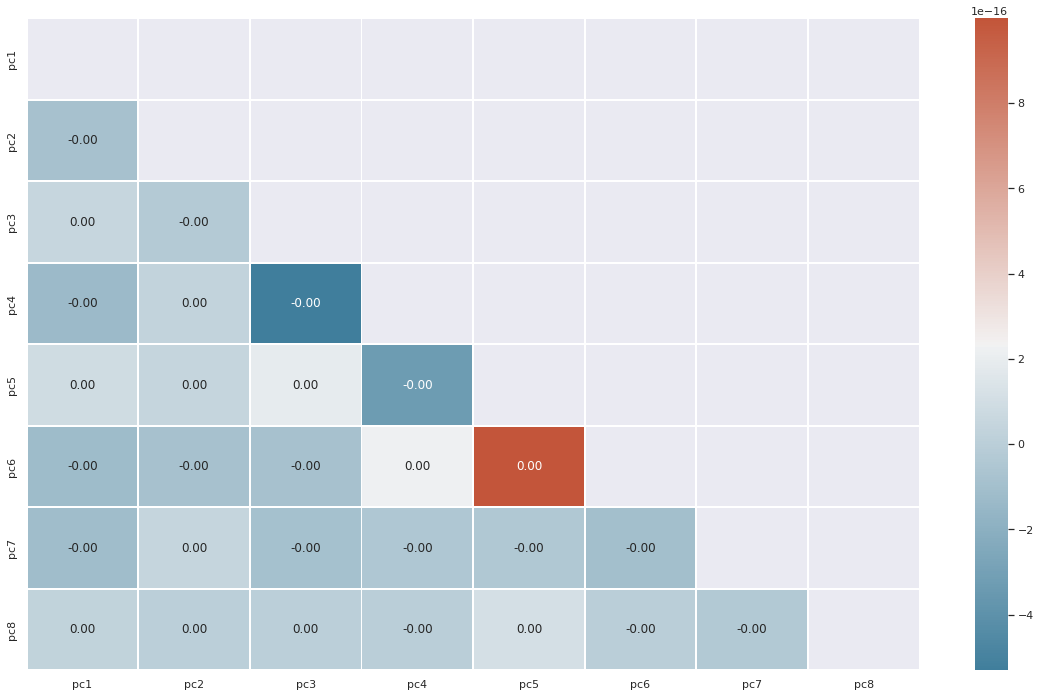

In [ ]:
df_pca = pd.concat([X_train_pca, X_test_pca])

plt.figure(figsize = (20, 12))

# compute the correlation matrix
corr = df_pca.corr()
# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(corr, mask = mask, linewidths = 1, cmap=cmap, annot = True, fmt = ".2f")
plt.show()

## Neural network

* Criar uma rede neuronal simple (1 camada densa, uma de droupout e uma de output) usando função softmax (como indicado pelo prof. Felipe numa das reunioes).
Nota: Esta componente serve apenas como parte experimental. Tendo em conta o numero reduzido de observações (<600) e a quantidade de epocas usadas (300), é possivel que os resultados, apesar de aparentemente bons, possam estar com algum overfitting. Este exemplo serviu apenas como forma de aprendizagem para usar tensorflow e keras.

Nota: Os resultados tambem vao ser aleatorios tendo em conta que os pesos iniciais vao influenciar os resultados finais (precisao colocada no documento pdf pode ser diferente da obtida no notebook).

In [ ]:


#training e testing
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["diagnosis","diagnosis OHE"]),
    df["diagnosis OHE"],
    random_state = 42,
    test_size = 0.25,
    stratify=df["diagnosis OHE"])

# Stratify = Faz com que dados de treino e teste tenham as mesmas proporçoes de B e M

preprocessParams = preprocessing.StandardScaler().fit(X_train)
x_train_normalized = preprocessParams.transform(X_train)
x_test_normalized = preprocessParams.transform(X_test)



In [ ]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                310       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 332
Trainable params: 332
Non-trainable params: 0
_________________________________________________________________
None
Test Accuracy: 0.9650349617004395


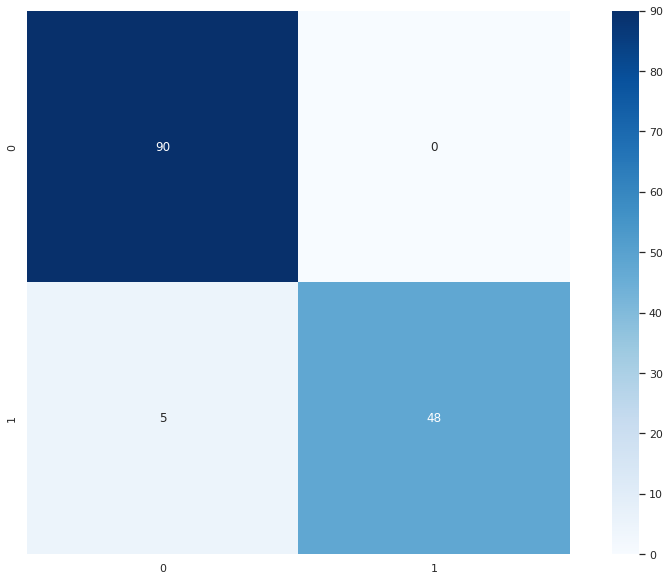

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        90
         1.0       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



In [ ]:
def create_model_architecture(input_size):
  """
  Parameters:
  ----------
  Input size: X_training data normalized

  Returns:
  -------
  Model
  
  """
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Dense(10,input_shape=x_train_normalized.shape[1:],activation=tf.nn.softmax),
                                      tf.keras.layers.Dropout(rate=0.2,seed=100),
                                      tf.keras.layers.Dense(2, activation=tf.nn.softmax)])  #poderia ser sigmoide com 1 layer em vez de softmax

  print(model.summary())
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate=1e-2,
      decay_steps=10000,
      decay_rate=0.5
  )
  model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule),
                loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics = ["acc","AUC","Precision","Recall"])
  
  return model

model_architecture = create_model_architecture(x_train_normalized.shape[1:])
neural_model = train_model(model_architecture, X_training=x_train_normalized, y_training = y_train, X_testing = x_test_normalized, y_testing=y_test, kfold=kfold, scoring=scoring,is_neural_net = True,k_fold_cv=False,cm=True)


# Evaluation for all models as table format

In [ ]:
results = [lr_cv[1],svm_cv[1], decision_tree[1],pca_logreg_model[1],nb_cv[1], xgb_model[1],neural_model[1]] #colocar lista dos modelos feitos

names = ["Logistic Regression","SVM", "Decision Tree","Logistic Regression with PCA","Naive Bayes", "XGBoost", "Neural Network"] #colocar nomes para o grafico

Text(0.5, 1.0, 'Comparação de modelos para Classificação')

<Figure size 864x504 with 0 Axes>

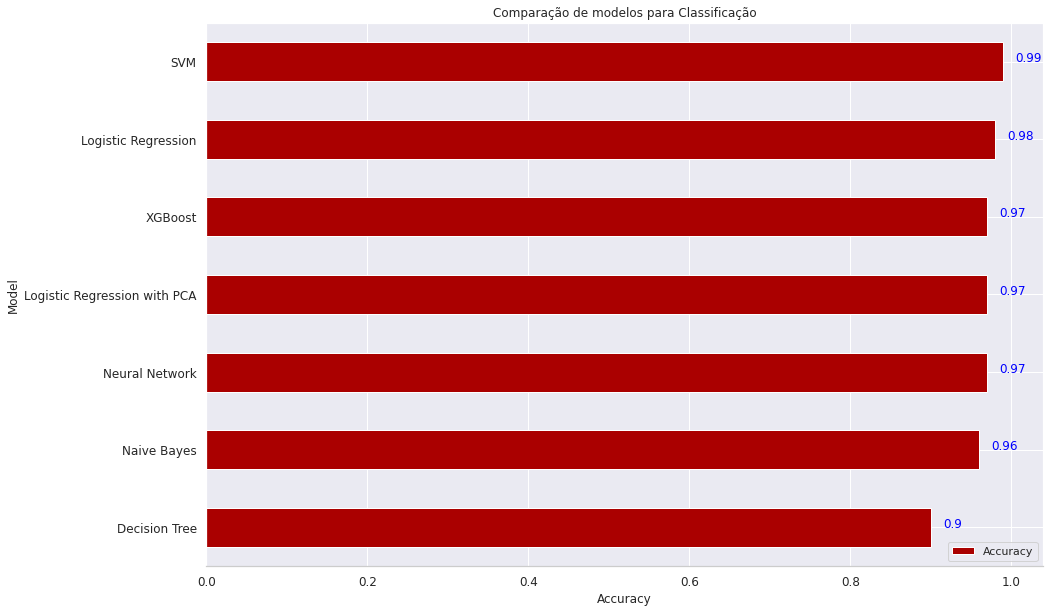

In [ ]:
df_new = pd.DataFrame(list(zip(names, results)), columns= ["Model","Accuracy"])
df_sorted = df_new.sort_values("Accuracy")
df_sorted.index=df_sorted.Model
df_sorted = df_sorted.round(2)
plt.figure(figsize=(12,7))
ax = df_sorted.plot(kind="barh", facecolor="#AA0000",figsize=(15,10), fontsize=12)

gap = 0.015 # Space between the text and the end of the bar
# You have to call ax.text() for each bar
# They are already sorted and you need the index of the bar
for i, v in enumerate(df_sorted.Accuracy):
    ax.text(v + gap, i, str(v), color='blue') # Place the text at x=v+gap and y= idx

ax.spines["bottom"].set_color("#CCCCCC")
ax.set_xlabel("Accuracy", fontsize=12)
ax.set_ylabel("Model",fontsize=12)
plt.title("Comparação de modelos para Classificação")